 Object Type         | Description                                                           
 ------------------- | --------------------------------------------------------------------- 
 `Team`              | The team associated with the event.                                   
 `From`              | The player in possession of the ball at the start of the event.       
 `To`                | The player in possession of the ball at the end of the event if the ownership changed.|
 `case:concept:name` | Unique ID for each case--an attack. 'AA' indicates away team attack, 'HA' indicates home team attack    
 `end_grid`          | The grid zone where the event ends.                              
 ------------------- | --------------------------------------------------------------------- 
 Attribute                      | Description                                               
 `attribute:subtype`            | Event subtype (e.g. `"PASS"`, `"GOAL"`, `"SHOT"`). For details please refer to the data documentation.     
 `attribute:start_x`, `start_y` | X/Y coordinates of the ball at the start of the event.        
 `attribute:end_x`, `end_y`     | X/Y coordinates of the ball at the end of the event.          
 `attribute:duration`           | Duration (in seconds) of the event.                           
 `attribute:travel_distance`    | Distance traveled by the ball.                                
 `attribute:start_grid`         | Grid ID where the event begins.                               
 `attribute:crossed_grid`       | If the event start in one grid and ends in another.           
 `attribute:attack_game`        | Identifier for attack sequence. Combined count of both team. 
 `attribute:attack_successful`  | Boolean flag — `True` if the attack led to a goal.            
 `attribute:home_team_score`    | Cumulative score of the home team at this point in the match.
 `attribute:away_team_score`    | Cumulative score of the away team at this point in the match. 


In [9]:
import pandas as pd
import pm4py
from Soccer_ocel import soccer_ocel_df, soccer_df_to_ocel
import numpy as np
from filters_and_analysis import filter_by_involved_player, filter_by_last_player, movement_frequency_report

In [2]:
# settings
## Resolution of the grid
x_fields = 6
y_fields = 4

df = pd.read_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawEventsData.csv')
tracking_data_away_df = pd.read_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawTrackingData_Away_Team.csv', skiprows=2)
tracking_data_home_df = pd.read_csv('sample-data\data\Sample_Game_1\Sample_Game_1_RawTrackingData_Home_Team.csv', skiprows=2)

ocel_df = soccer_ocel_df(df, tracking_data_home_df, tracking_data_away_df, x_fields=x_fields, y_fields=y_fields)

c:\Users\Vito\Documents\pm\Soccer\Soccer_ocel.py:199: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_change_events.rename(columns={'Grid Position': 'To Position',


In [ ]:
#ocel_df = ocel_df[~((ocel_df['concept:name'] == 'Player changes position') & (ocel_df['end_grid'].isna()))]

In [ ]:
#ocel_df['concept:name'] = ocel_df.apply(lambda row: f"{row['concept:name']}-{row['end_grid']}" if pd.notnull(row['end_grid']) and row['concept:name']=='Player changes position' else row['concept:name'],axis=1)

In [ ]:
#define classes among players--goal keeper -- attacker -- defender

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
ocel_df[(ocel_df['case:concept:name']=='AA156') & (ocel_df['concept:name']!='Player changes position')]#156

Team   concept:name attribute:subtype  Period  Start Frame  \
15896  Away       RECOVERY      INTERCEPTION     2.0     124197.0   
15897  Away       PASS Out               NaN     2.0     124219.0   
15901  Away  PASS Received               NaN     2.0     124219.0   
15913  Away       PASS Out               NaN     2.0     124324.0   
15915  Away  PASS Received               NaN     2.0     124324.0   
15921  Away       PASS Out               NaN     2.0     124396.0   
15930  Away  PASS Received               NaN     2.0     124396.0   
15943  Away       PASS Out               NaN     2.0     124504.0   
15945  Away  PASS Received               NaN     2.0     124504.0   
15949  Away       PASS Out               NaN     2.0     124536.0   
15962  Away  PASS Received               NaN     2.0     124536.0   
15988  Away       PASS Out               NaN     2.0     124721.0   
15991  Away  PASS Received               NaN     2.0     124721.0   
15992  Away           SHOT    OFF TARGET-OUT     2.0     124755.0   

       Start Time [s]  End Frame  End Time [s]    Player  attribute:start_x  \
15896         4967.88   124197.0       4967.88  Player15               0.31   
15897         4968.76   124259.0       4970.36  Player15               0.32   
15901         4968.76   124259.0       4970.36  Player17               0.27   
15913         4972.96   124356.0       4974.24  Player17               0.23   
15915         4972.96   124356.0       4974.24  Player16               0.26   
15921         4975.84   124451.0       4978.04  Player16               0.27   
15930         4975.84   124451.0       4978.04  Player27               0.50   
15943         4980.16   124514.0       4980.56  Player27               0.55   
15945         4980.16   124514.0       4980.56  Player28               0.59   
15949         4981.44   124614.0       4984.56  Player28               0.60   
15962         4981.44   124614.0       4984.56  Player27               0.81   
15988         4988.84   124751.0       4990.04  Player27               0.94   
15991         4988.84   124751.0       4990.04  Player23               0.85   
15992         4990.20   124775.0       4991.00  Player23               0.85   

       attribute:start_y  attribute:end_x  attribute:end_y  \
15896               0.51              NaN              NaN   
15897               0.53             0.27             0.78   
15901               0.78             0.27             0.78   
15913               0.75             0.26             0.52   
15915               0.52             0.26             0.52   
15921               0.51             0.50             0.07   
15930               0.07             0.50             0.07   
15943               0.07             0.59             0.22   
15945               0.22             0.59             0.22   
15949               0.21             0.81             0.04   
15962               0.04             0.81             0.04   
15988               0.30             0.85             0.42   
15991               0.42             0.85             0.42   
15992               0.41             1.03             0.42   

               time:timestamp  attribute:duration  attribute:travel_distance  \
15896 1970-01-01 01:22:47.880                0.00                        NaN   
15897 1970-01-01 01:22:48.760                1.60                   0.254951   
15901 1970-01-01 01:22:50.360                1.60                   0.254951   
15913 1970-01-01 01:22:52.960                1.28                   0.231948   
15915 1970-01-01 01:22:54.240                1.28                   0.231948   
15921 1970-01-01 01:22:55.840                2.20                   0.496488   
15930 1970-01-01 01:22:58.040                2.20                   0.496488   
15943 1970-01-01 01:23:00.160                0.40                   0.155242   
15945 1970-01-01 01:23:00.560                0.40                   0.155242   
15949 1970-01-01 01:23:01.440                3.12     

In [54]:
def get_player_trajectory(df, player_col_name):

    x_idx = df.columns.get_loc(player_col_name)
    
    y_idx = x_idx + 1
    y_col_name = df.columns[y_idx]

    time_points = df['Time [s]'].values

    x_coords = df[player_col_name].values
    y_coords = df[y_col_name].values

    mask = (~pd.isnull(x_coords)) & (~pd.isnull(y_coords))
    time_points = time_points[mask]
    x_coords = x_coords[mask]
    y_coords = y_coords[mask]

    return time_points, x_coords, y_coords
def calculate_zone_fractions(x_coords, team):
    if team == 'Away':
        # Attacking direction is right (increasing x)
        defense_zone = (0.0, 0.5)
        #midfield_zone = (0.5, 0.75)
        attack_zone = (0.5, 1.0)
    else:  # Home team attacks left
        defense_zone = (0.5, 1.0)
        #midfield_zone = (0.25, 0.5)
        attack_zone = (0.0, 0.5)

    total = len(x_coords)
    if total == 0:
        return 0, 0, 0

    defense_frac = ((x_coords >= defense_zone[0]) & (x_coords < defense_zone[1])).sum() / total
    #midfield_frac = ((x_coords >= midfield_zone[0]) & (x_coords < midfield_zone[1])).sum() / total
    attack_frac  = ((x_coords >= attack_zone[0])  & (x_coords < attack_zone[1])).sum() / total

    return defense_frac, attack_frac
def classify_all_players(tracking_df, team_name):
    def_L=[]
    att_L=[]
    for col in tracking_df.columns:
        if col.startswith("Player"):
            _,x, y = get_player_trajectory(tracking_df, col)
            def_frac, att_frac = calculate_zone_fractions(x, team_name)
            role = np.argmax([def_frac, att_frac])
            if role==0:
                def_L.append(col)
            else:
                att_L.append(col)

    return def_L, att_L
away_def,away_att = classify_all_players(tracking_data_away_df, 'Away')
home_def,home_att = classify_all_players(tracking_data_home_df, 'Home')
att_players=away_att+home_att
def_players=away_def+home_def
print(att_players)
print(def_players)


['Player15', 'Player16', 'Player17', 'Player18', 'Player19', 'Player21', 'Player22', 'Player23', 'Player26', 'Player27', 'Player28', 'Player1', 'Player13', 'Player14']
['Player25', 'Player20', 'Player24', 'Player11', 'Player2', 'Player3', 'Player4', 'Player5', 'Player6', 'Player7', 'Player8', 'Player9', 'Player10', 'Player12']


In [51]:
goalkeepers=[]
col_L,frac_L=[],[]
for col in tracking_data_away_df.columns:
    if col.startswith("Player"):
        _,x_trace,y_trace=get_player_trajectory(tracking_data_away_df,col)
        frac=fraction_time_in_goal_area(x_trace,y_trace, 'Away')
        col_L.append(col)
        frac_L.append(frac)
goalkeepers.append(col_L[np.argmax(frac)])
col_L,frac_L=[],[]
for col in tracking_data_home_df.columns:
    if col.startswith("Player"):
        _,x_trace,y_trace=get_player_trajectory(tracking_data_home_df,col)
        frac=fraction_time_in_goal_area(x_trace,y_trace, 'Home')
        col_L.append(col)
        frac_L.append(frac)
goalkeepers.append(col_L[np.argmax(frac)])

0.16325531357323145
0.033495165717280666
0.012764989034936485
0.014971794270581908
0.0022068052356454216
0.0040207403188112015
0.03579162241562418
0.016178640883825497
0.008262452161056996
0.006944540225921686
0.020056473325265715
0.011325765465528015
0.0025433950390686454
0.0
0.13595299504848074
0.004260694557444439
0.003599851040646594
0.0061307807952774365
0.0027654028109181687
0.008385859895452602
0.0035994911997401873
0.0017723404548777293
0.008420341227259561
0.009047901466146228
0.0005354553842098326
0.0001424197108879869
0.0
0.0


In [ ]:
att_players = [p for p in att_players if p not in goalkeepers]
def_players = [p for p in def_players if p not in goalkeepers]

14
14
14
12


In [58]:
ocel_df['Goalkeeper'] = np.nan
ocel_df['Attacker'] = np.nan
ocel_df['Defender'] = np.nan

ocel_df.loc[ocel_df['Player'].isin(att_players), 'Attacker'] = ocel_df['Player']
ocel_df.loc[ocel_df['Player'].isin(goalkeepers), 'Goalkeeper'] = ocel_df['Player']
ocel_df.loc[ocel_df['Player'].isin(def_players), 'Defender'] = ocel_df['Player']

C:\Users\Vito\AppData\Local\Temp\ipykernel_20512\2618469596.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Player19' 'Player19' 'Player15' ... 'Player23' 'Player23' 'Player13']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  ocel_df.loc[ocel_df['Player'].isin(att_players), 'Attacker'] = ocel_df['Player']
C:\Users\Vito\AppData\Local\Temp\ipykernel_20512\2618469596.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '['Player25' 'Player11' 'Player25' 'Player25' 'Player11' 'Player11'
 'Player25' 'Player25' 'Player25' 'Player25' 'Player25' 'Player11'
 'Player25' 'Player11' 'Player25' 'Player25' 'Player11' 'Player25'
 'Player11' 'Player25' 'Player11' 'Player25' 'Player25' 'Player11'
 'Player25' 'Player25' 'Player25' 'Player11' 'Player25' 'Player25'
 'Player11' 'Player25' 'Player

In [70]:
from Soccer_ocel import soccer_df_to_ocel
from pm4py.objects.ocel.util.log_ocel import log_to_ocel_multiple_obj_types
def soccer_df_to_ocel_mod(df):
    #df = pm4py.format_dataframe(df, case_id='case:concept:name', activity_key='Activity', timestamp_key='Timestamp')
    event_log = pm4py.convert_to_event_log(df)

    # convert to ocel
    ocel= log_to_ocel_multiple_obj_types(event_log, activity_column='concept:name'
                                         , timestamp_column='time:timestamp'
                                         , obj_types=['ball','Goalkeeper','Attacker','Defender']
                                         ,additional_event_attributes=['attribute:subtype','Team','end_grid','case:concept:name'
                                                                       , 'attribute:start_x', 'attribute:start_y'
                                                                       , 'attribute:end_x', 'attribute:end_y' 
                                                                       , 'attribute:duration', 'attribute:travel_distance'
                                                                       , 'attribute:start_grid', 'attribute:crossed_grid'
                                                                       , 'attribute:attack_game', 'attribute:attack_successful'
                                                                       , 'attribute:home_team_score', 'attribute:away_team_score'
                                                                       ])
    return ocel

In [71]:
ocel= soccer_df_to_ocel_mod(ocel_df)

In [5]:
pm4py.write_ocel(ocel, "output_logs/game1.xmlocel")

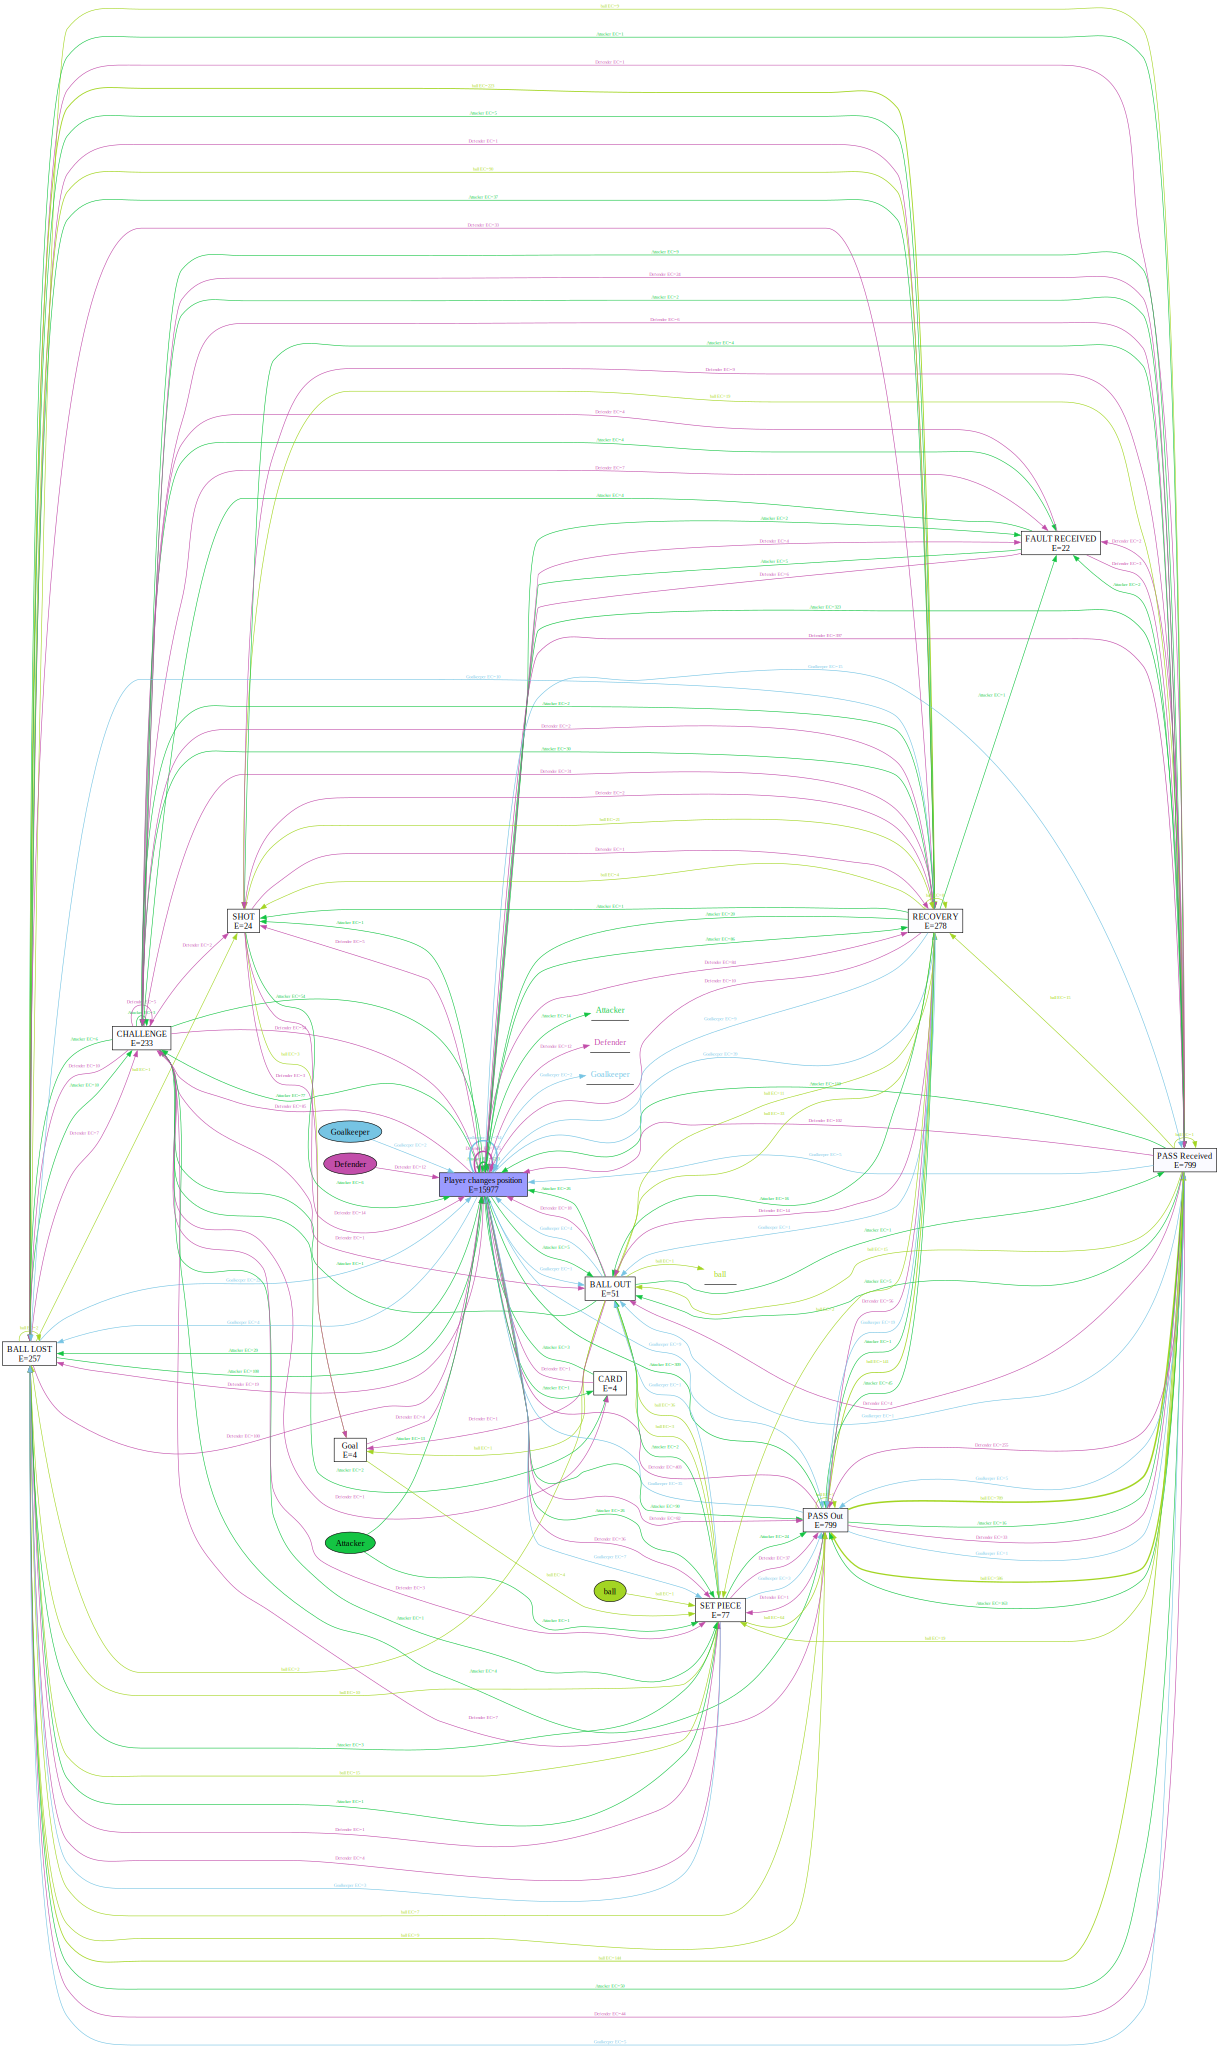

In [62]:
dfg=pm4py.ocel.discover_ocdfg(ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [ ]:
#split by team
Away_df=ocel_df[ocel_df['Team']=='Away']
Home_df=ocel_df[ocel_df['Team']=='Home']

In [58]:
aa_max = pd.Series(ocel_df['case:concept:name'].unique()).str.extract(r'^AA(\d+)$')[0].dropna().astype(int).max()
print('Away team made ',aa_max,' attacks')
ha_max = pd.Series(ocel_df['case:concept:name'].unique()).str.extract(r'^HA(\d+)$')[0].dropna().astype(int).max()
print('Home team made ',ha_max,' attacks')

Away team made  175  attacks
Home team made  180  attacks


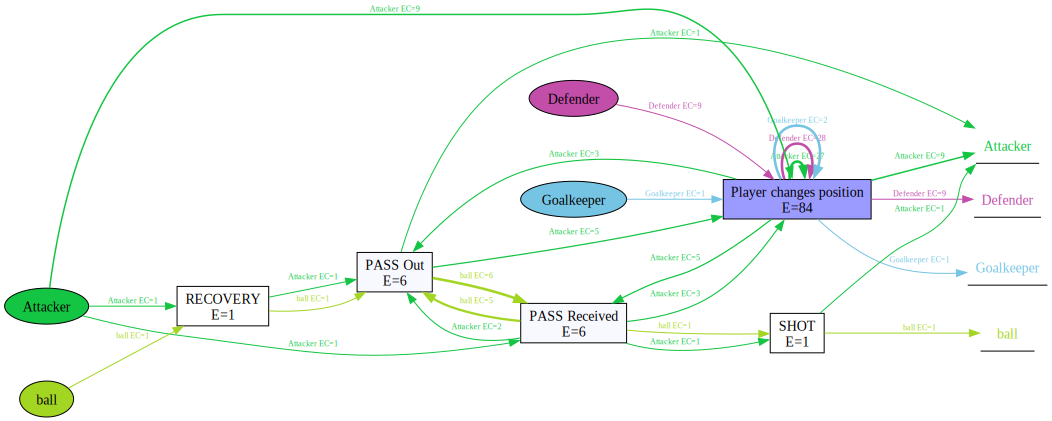

In [78]:
case_156=ocel_df[ocel_df['case:concept:name']=='AA156']
case_156_ocel=soccer_df_to_ocel_mod(case_156)
dfg=pm4py.ocel.discover_ocdfg(case_156_ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [72]:
#shot case
#All_shot_attacks=ocel_df[
#    ocel_df['concept:name'].str.startswith('SHOT') |
#    ocel_df['concept:name'].str.endswith('GOAL')]['case:concept:name'].unique()
#Goal_attack=ocel_df[ocel_df['concept:name'].str.endswith('GOAL')]['case:concept:name'].unique()

All_shot_attacks=ocel_df[
    ocel_df['concept:name'].str.startswith('SHOT') |
    ocel_df['attribute:subtype'].str.endswith('GOAL')]['case:concept:name'].unique()
Goal_attack = ocel_df[ocel_df['attribute:subtype'].str.endswith('GOAL', na=False)]['case:concept:name'].unique()

attack_df=ocel_df[ocel_df['case:concept:name'].isin(All_shot_attacks)]
Goal_attack_df=ocel_df[ocel_df['case:concept:name'].isin(Goal_attack)]
Failed_attack_df=ocel_df[ocel_df['case:concept:name'].isin(All_shot_attacks)&~ocel_df['case:concept:name'].isin(Goal_attack)]

In [65]:
#shot case last player only by team
def filter_by_last_player(df):
    relevant_events = df[
        df['concept:name'].str.startswith('SHOT') |
        df['concept:name'].str.endswith('GOAL')
    ].set_index('case:concept:name')['Player']
    
    # Step 3: Filter original DataFrame
    def include_row(row):
        if row['concept:name'] != 'Player changes position':
            return True
        last_player = relevant_events.get(row['case:concept:name'])
        return row['Player'] == last_player
    
    return df[df.apply(include_row, axis=1)]
def filter_by_involved_player(df):
    grouped = df.groupby('case:concept:name')

    def include_row(row):
        if row['concept:name'] != 'Player changes position':
            return True
        
        case_id = row['case:concept:name']
        player = row['Player']
        case_df = grouped.get_group(case_id)

        case_df_other = case_df[case_df['concept:name'] != 'Player changes position']

        involved = (case_df_other['Player'] == player)
        return involved.any()
    return df[df.apply(include_row, axis=1)]
last_player_attack_df=filter_by_last_player(attack_df)
last_player_goal_attack_df=filter_by_last_player(Goal_attack_df)
last_player_failed_attack_df=filter_by_last_player(Failed_attack_df)

#shot case all involved players by team
involved_player_attack_df=filter_by_involved_player(attack_df)
involved_player_goal_attack_df=filter_by_involved_player(Goal_attack_df)
involved_player_failed_attack_df=filter_by_involved_player(Failed_attack_df)

In [73]:
Goal_attack_ocel= soccer_df_to_ocel_mod(Goal_attack_df)
Failed_attack_ocel= soccer_df_to_ocel_mod(Failed_attack_df)
Failed_attack_ocel_home= soccer_df_to_ocel_mod(Failed_attack_df[Failed_attack_df['Team']=='Home'])
Failed_attack_ocel_away= soccer_df_to_ocel_mod(Failed_attack_df[Failed_attack_df['Team']=='Away'])

In [22]:
pm4py.write_ocel(Goal_attack_ocel, "output_logs/game1_goal.xmlocel")
pm4py.write_ocel(Failed_attack_ocel, "output_logs/game1_failed.xmlocel")
pm4py.write_ocel(Failed_attack_ocel_home, "output_logs/game1_failed_home.xmlocel")
pm4py.write_ocel(Failed_attack_ocel_away, "output_logs/game1_failed_away.xmlocel")

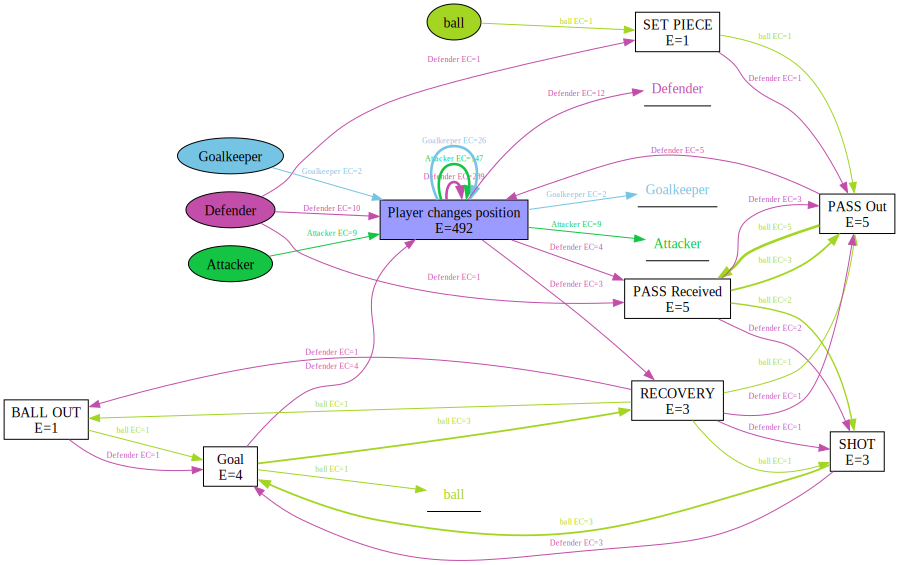

In [74]:
dfg=pm4py.ocel.discover_ocdfg(Goal_attack_ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

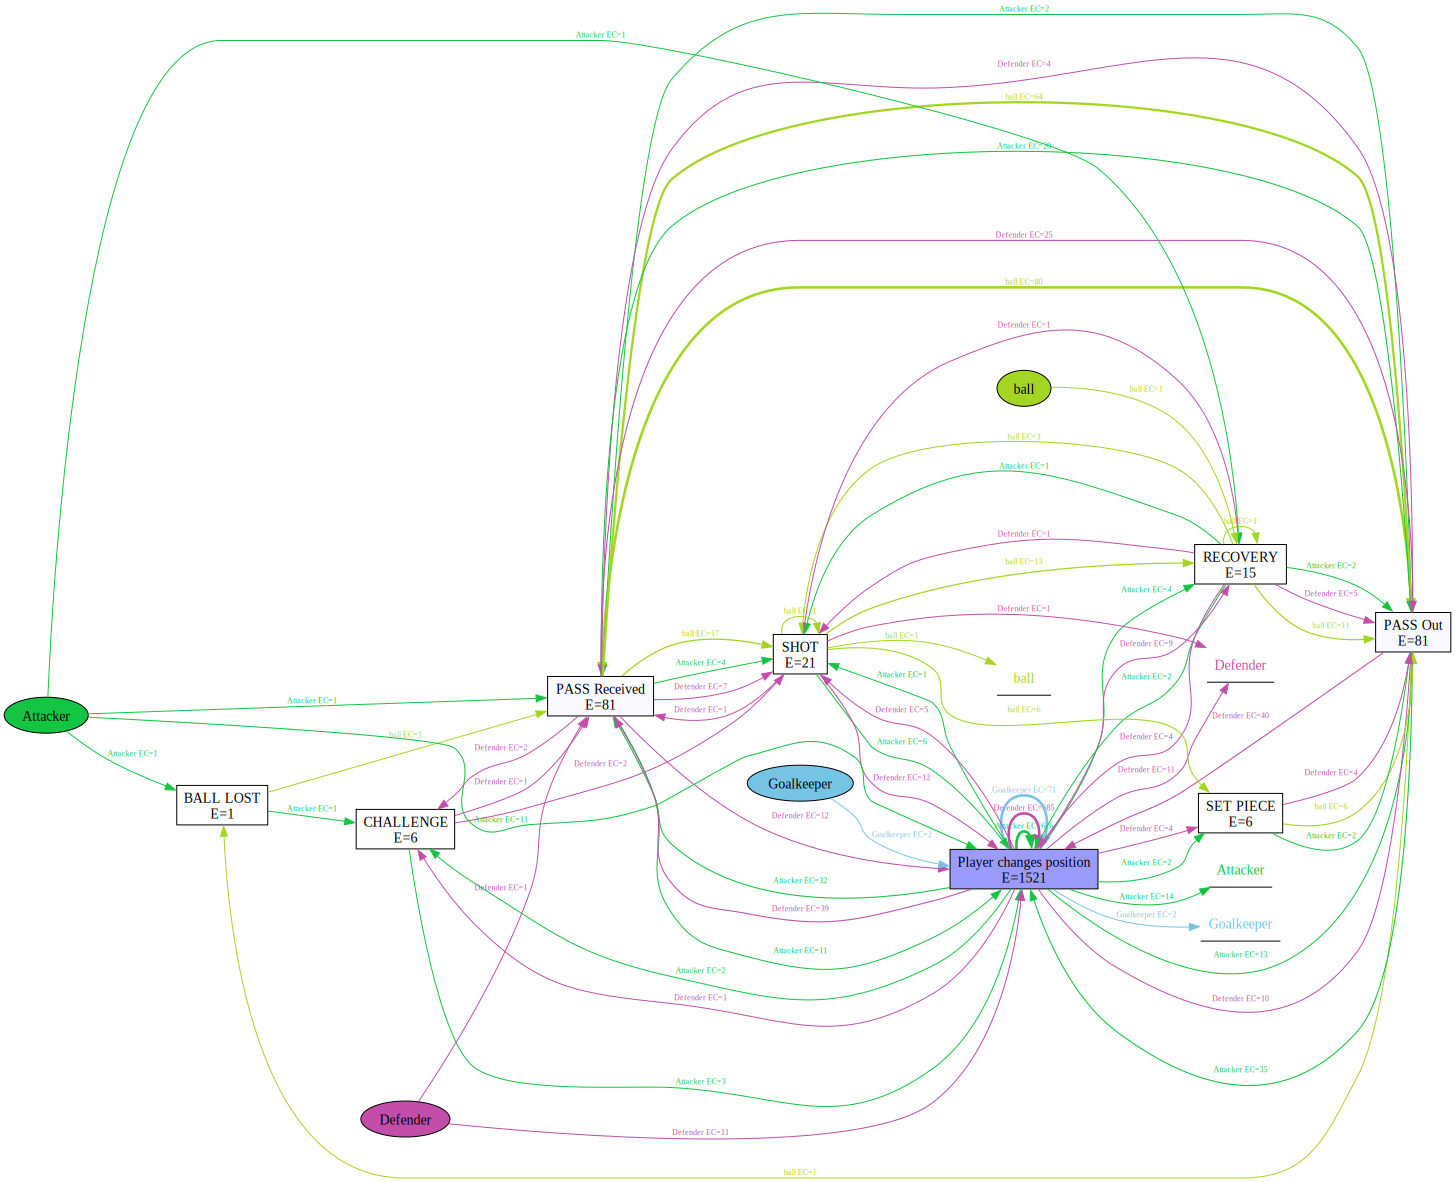

In [75]:
dfg=pm4py.ocel.discover_ocdfg(Failed_attack_ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

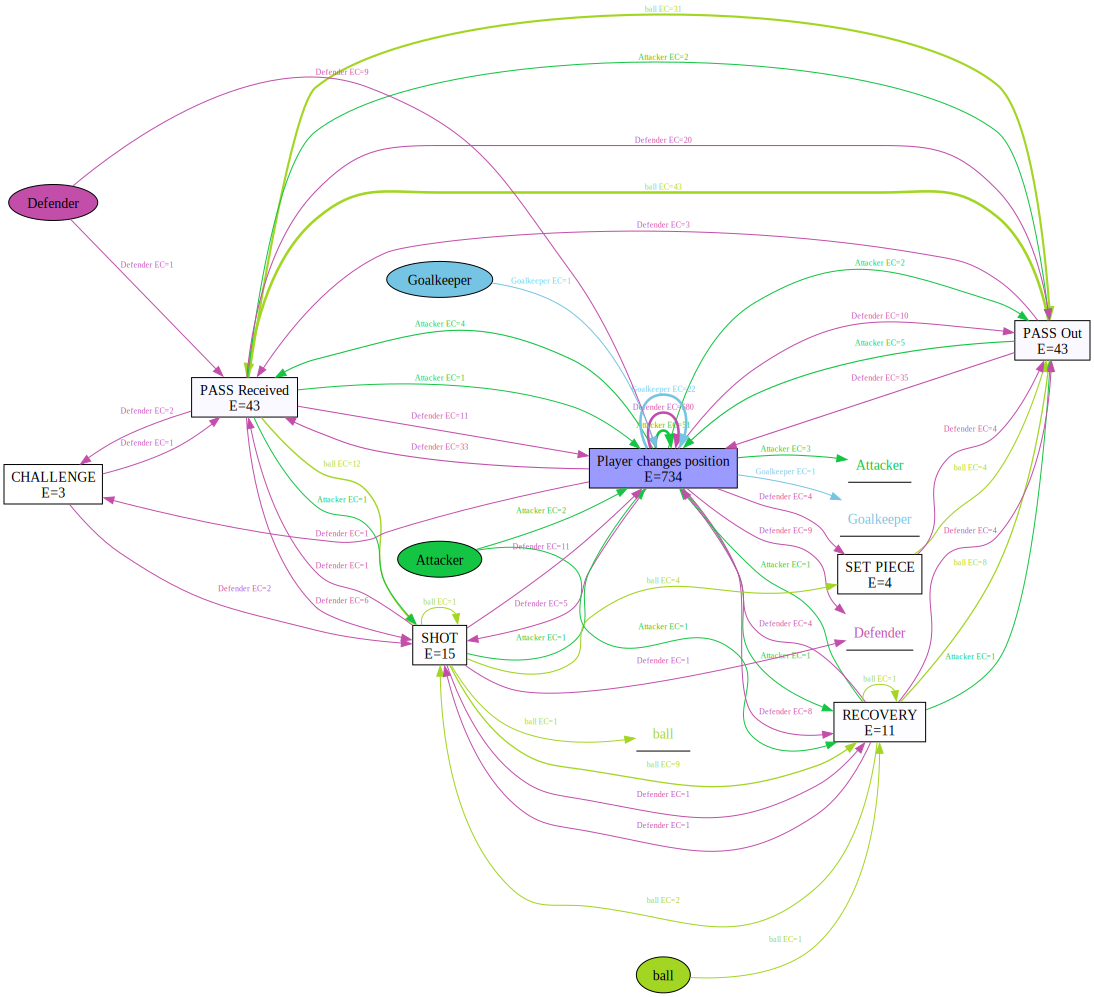

In [76]:
dfg=pm4py.ocel.discover_ocdfg(Failed_attack_ocel_home)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

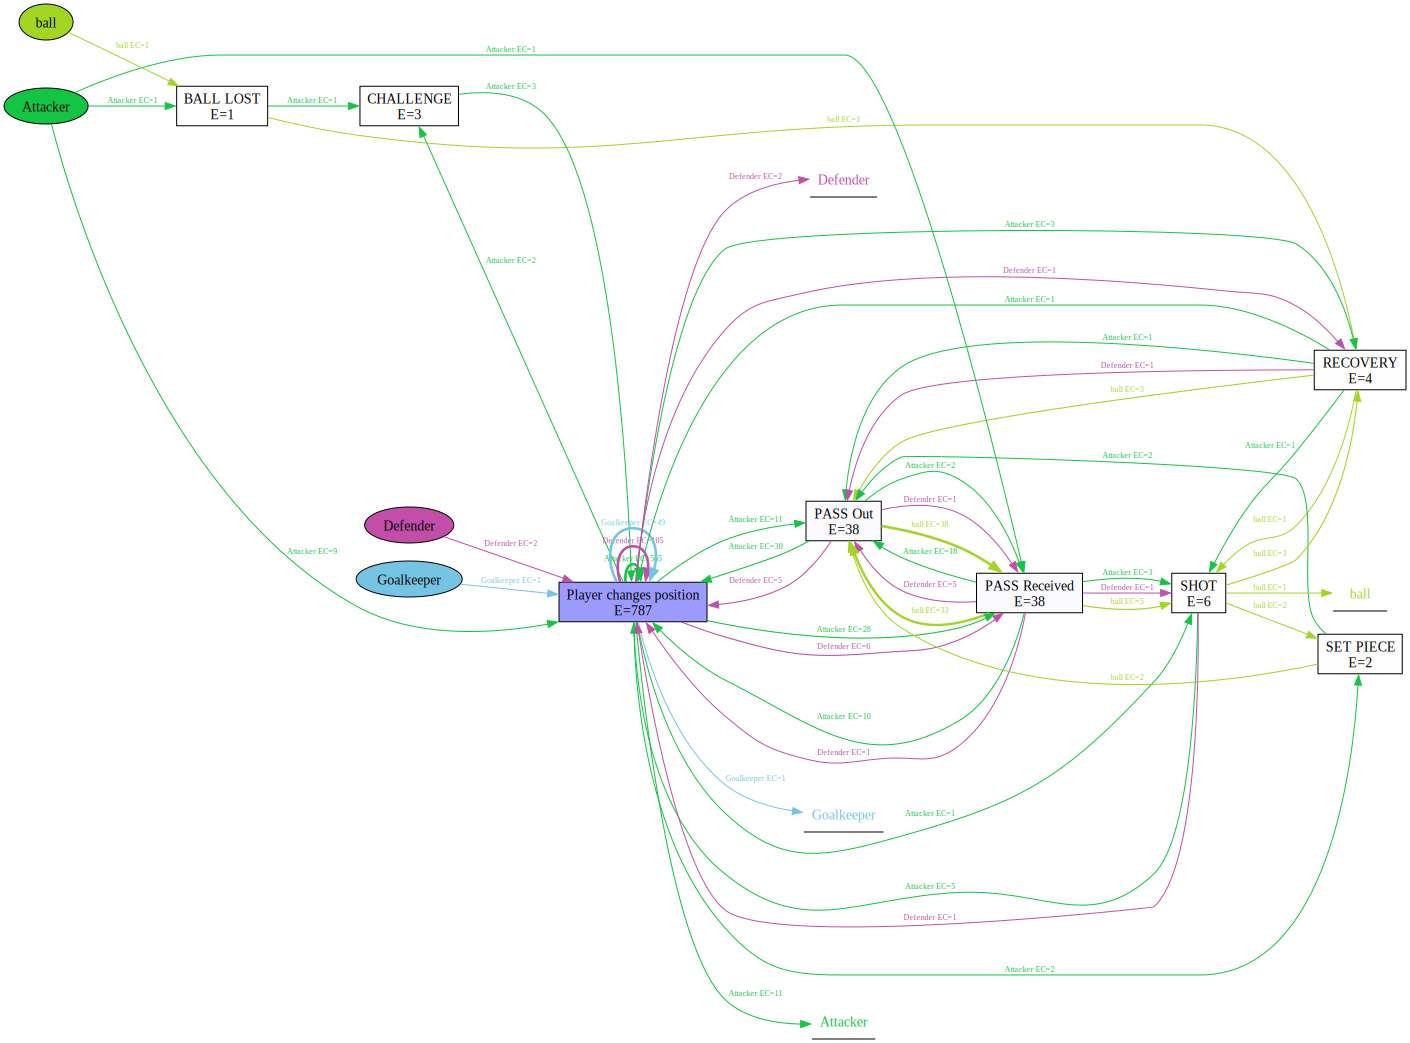

In [77]:
dfg=pm4py.ocel.discover_ocdfg(Failed_attack_ocel_away)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [18]:
#shot case last player only by team
#last_player_attack_df=filter_by_last_player(attack_df)
#last_player_goal_attack_df=filter_by_last_player(Goal_attack_df)
#last_player_failed_attack_df=filter_by_last_player(Failed_attack_df)

#shot case all involved players by team
involved_player_attack_df=filter_by_involved_player(attack_df)
involved_player_goal_attack_df=filter_by_involved_player(Goal_attack_df)
involved_player_failed_attack_df=filter_by_involved_player(Failed_attack_df)

In [19]:
involved_player_Goal_attack_ocel= soccer_df_to_ocel(involved_player_goal_attack_df)
involved_player_Failed_attack_ocel= soccer_df_to_ocel(involved_player_failed_attack_df)
involved_player_Failed_attack_ocel_home= soccer_df_to_ocel(involved_player_failed_attack_df[involved_player_failed_attack_df['Team']=='Home'])
involved_player_Failed_attack_ocel_away= soccer_df_to_ocel(involved_player_failed_attack_df[involved_player_failed_attack_df['Team']=='Away'])

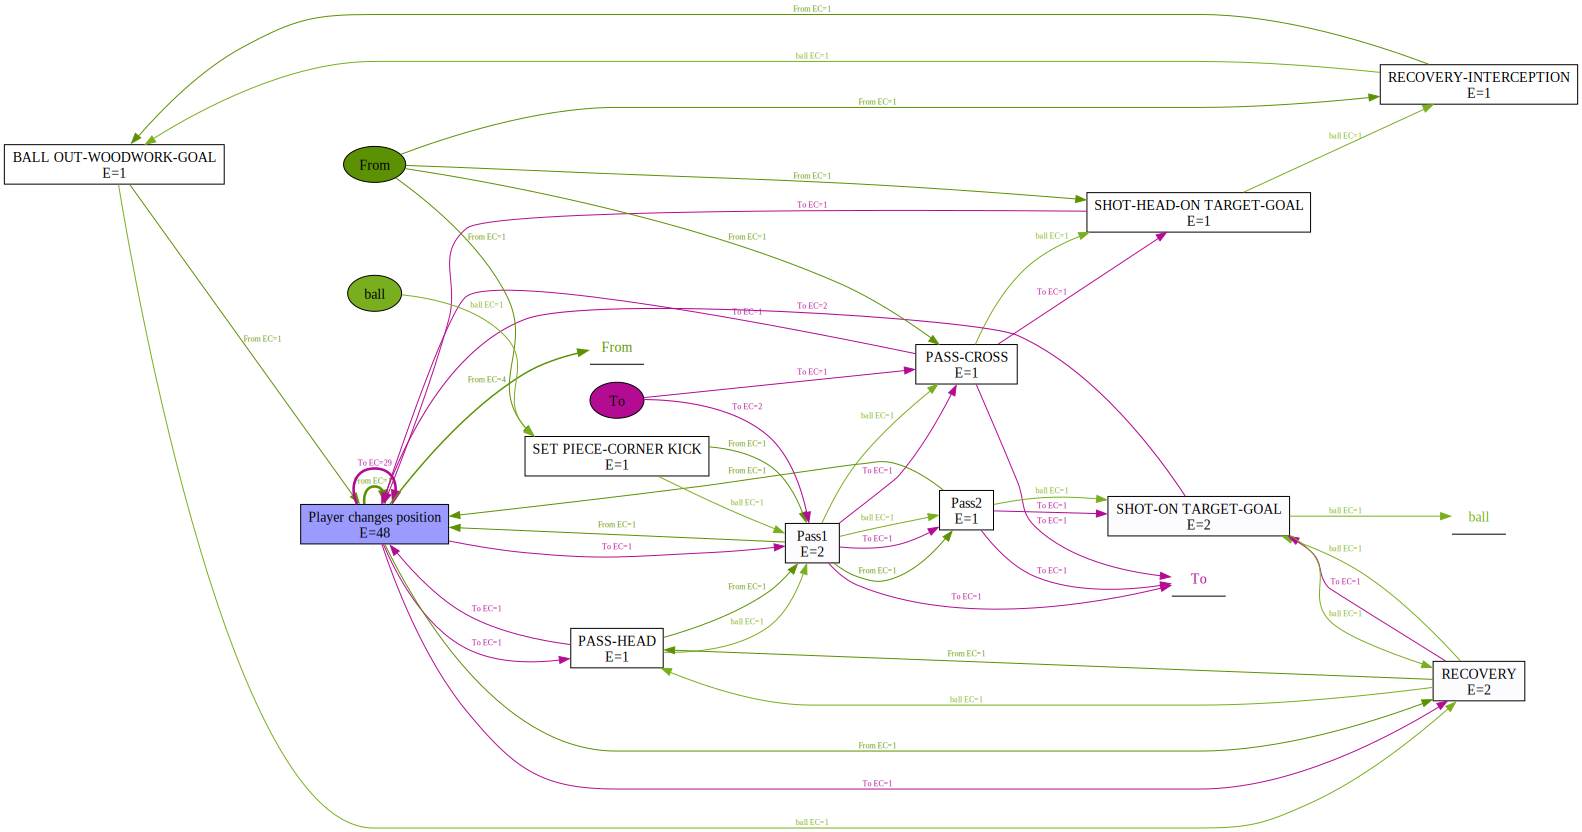

In [20]:
dfg=pm4py.ocel.discover_ocdfg(involved_player_Goal_attack_ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

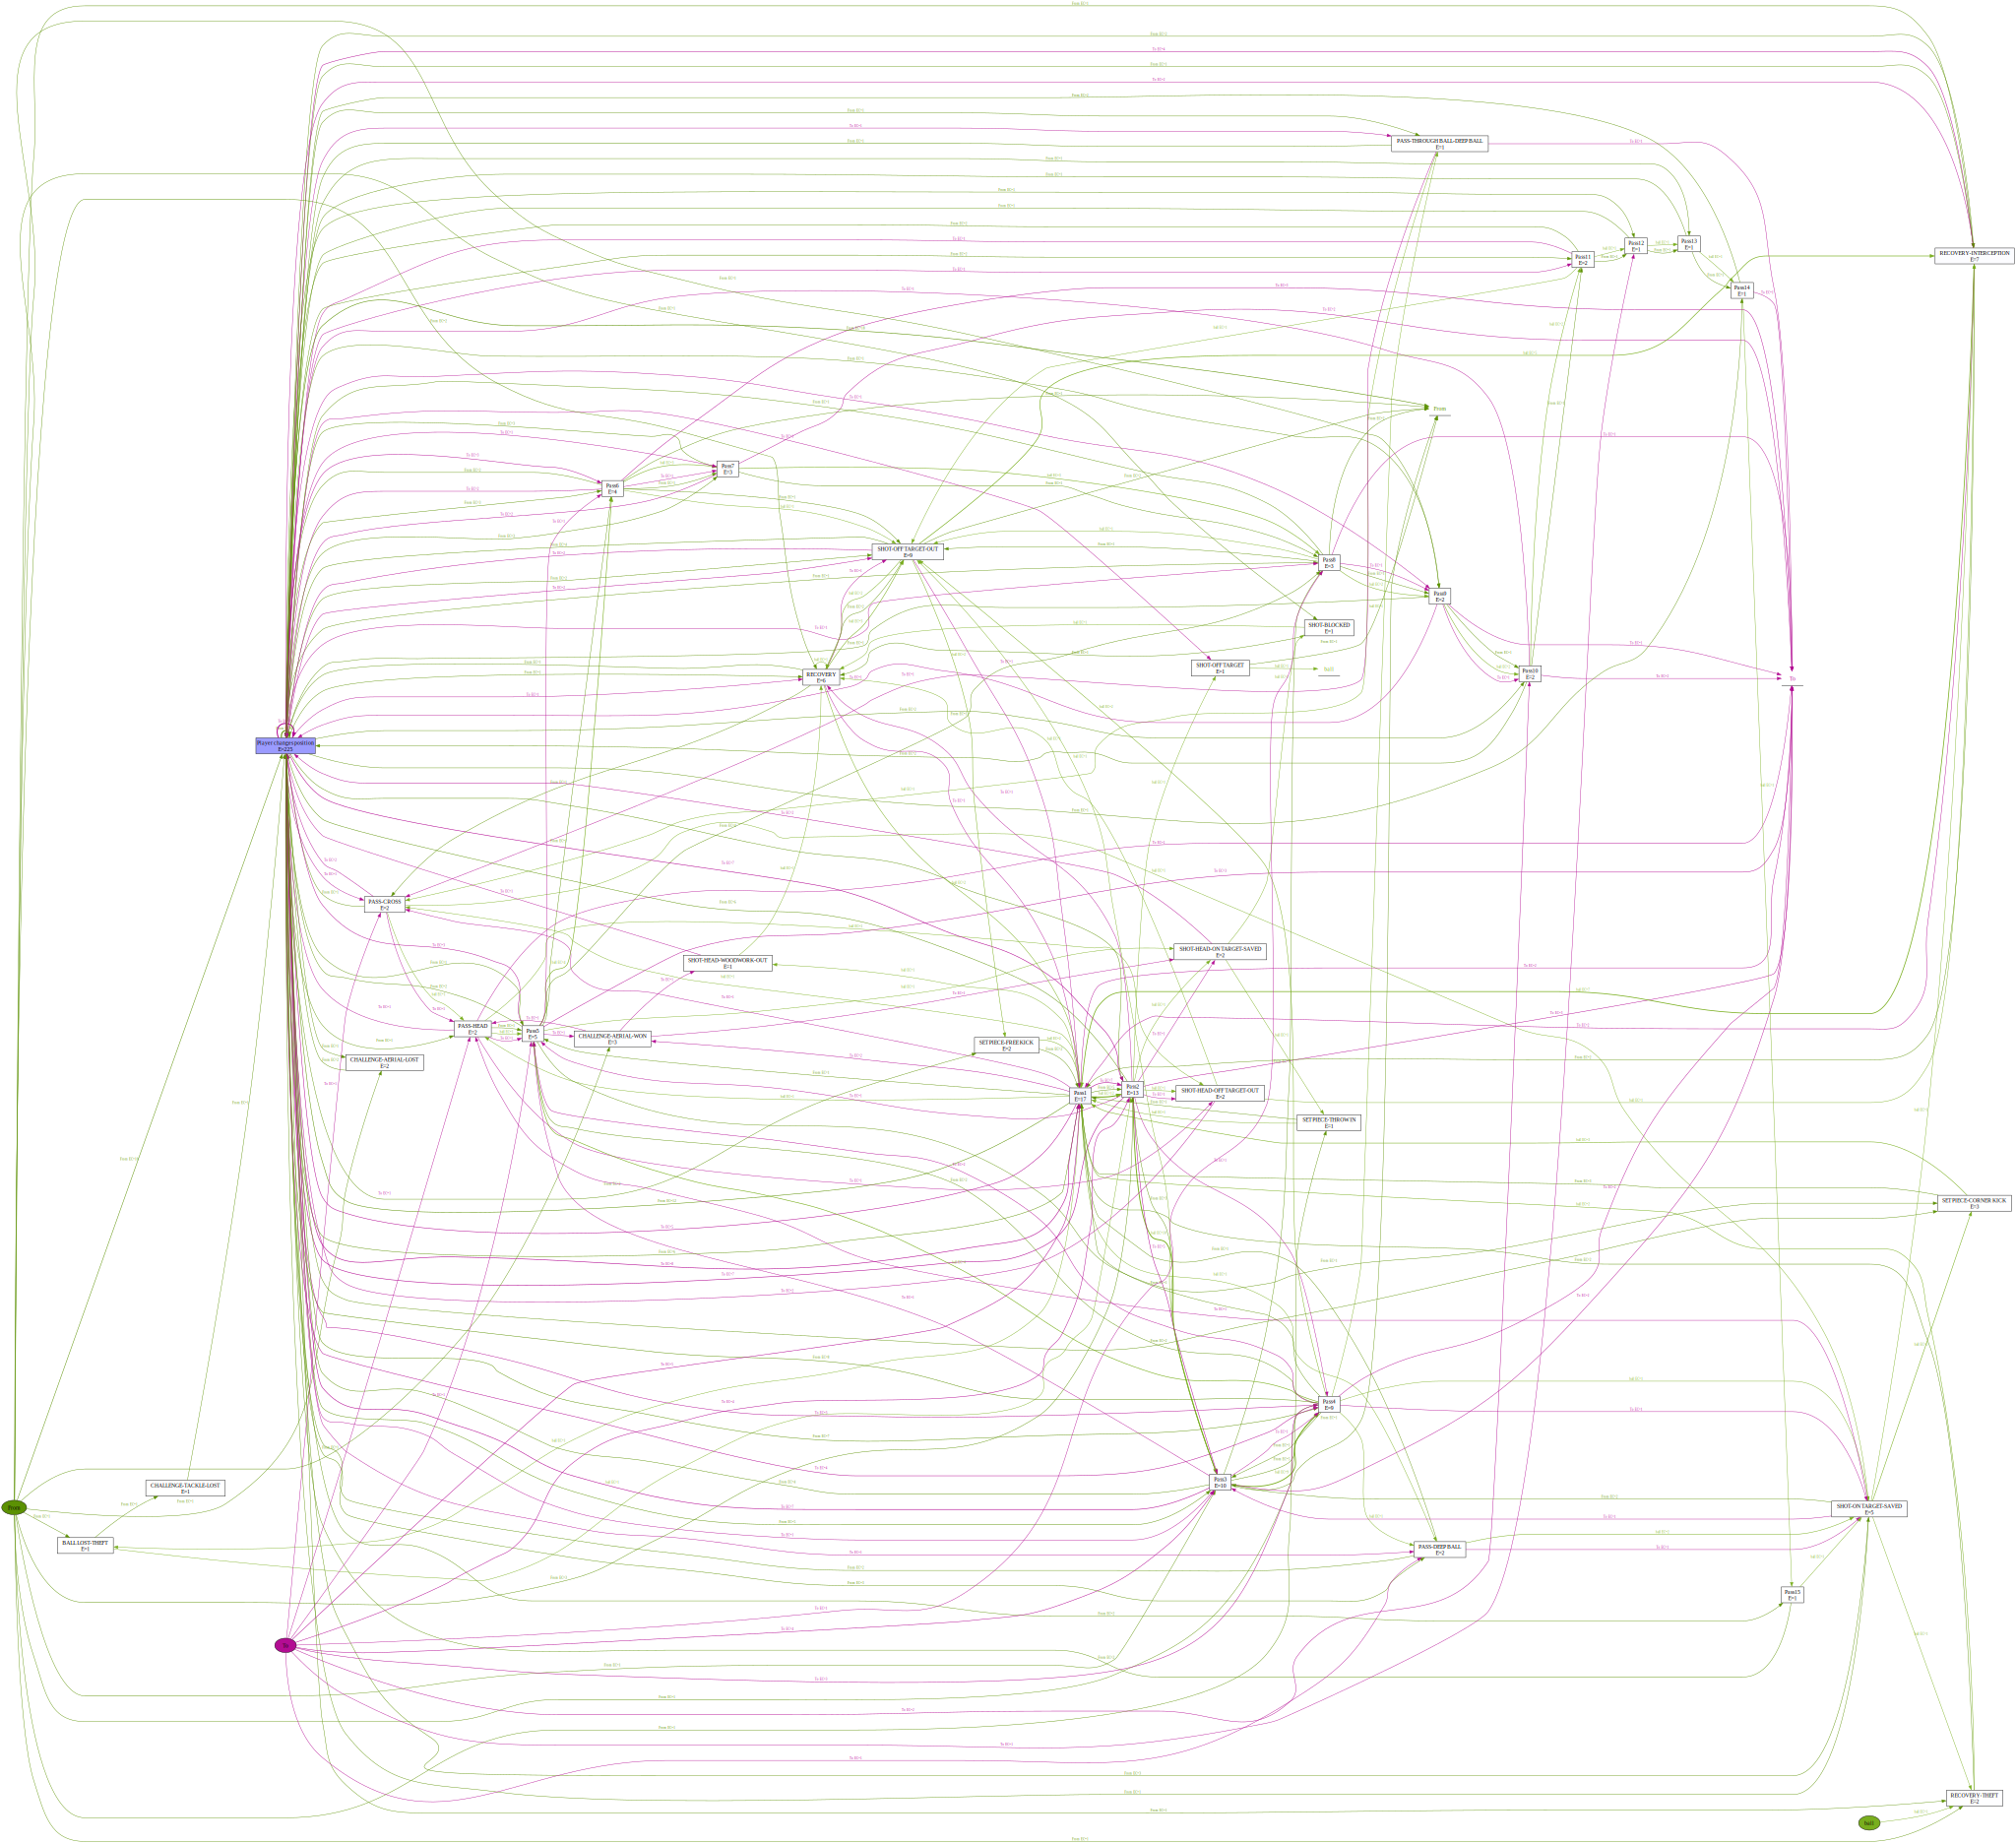

In [21]:
dfg=pm4py.ocel.discover_ocdfg(involved_player_Failed_attack_ocel)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

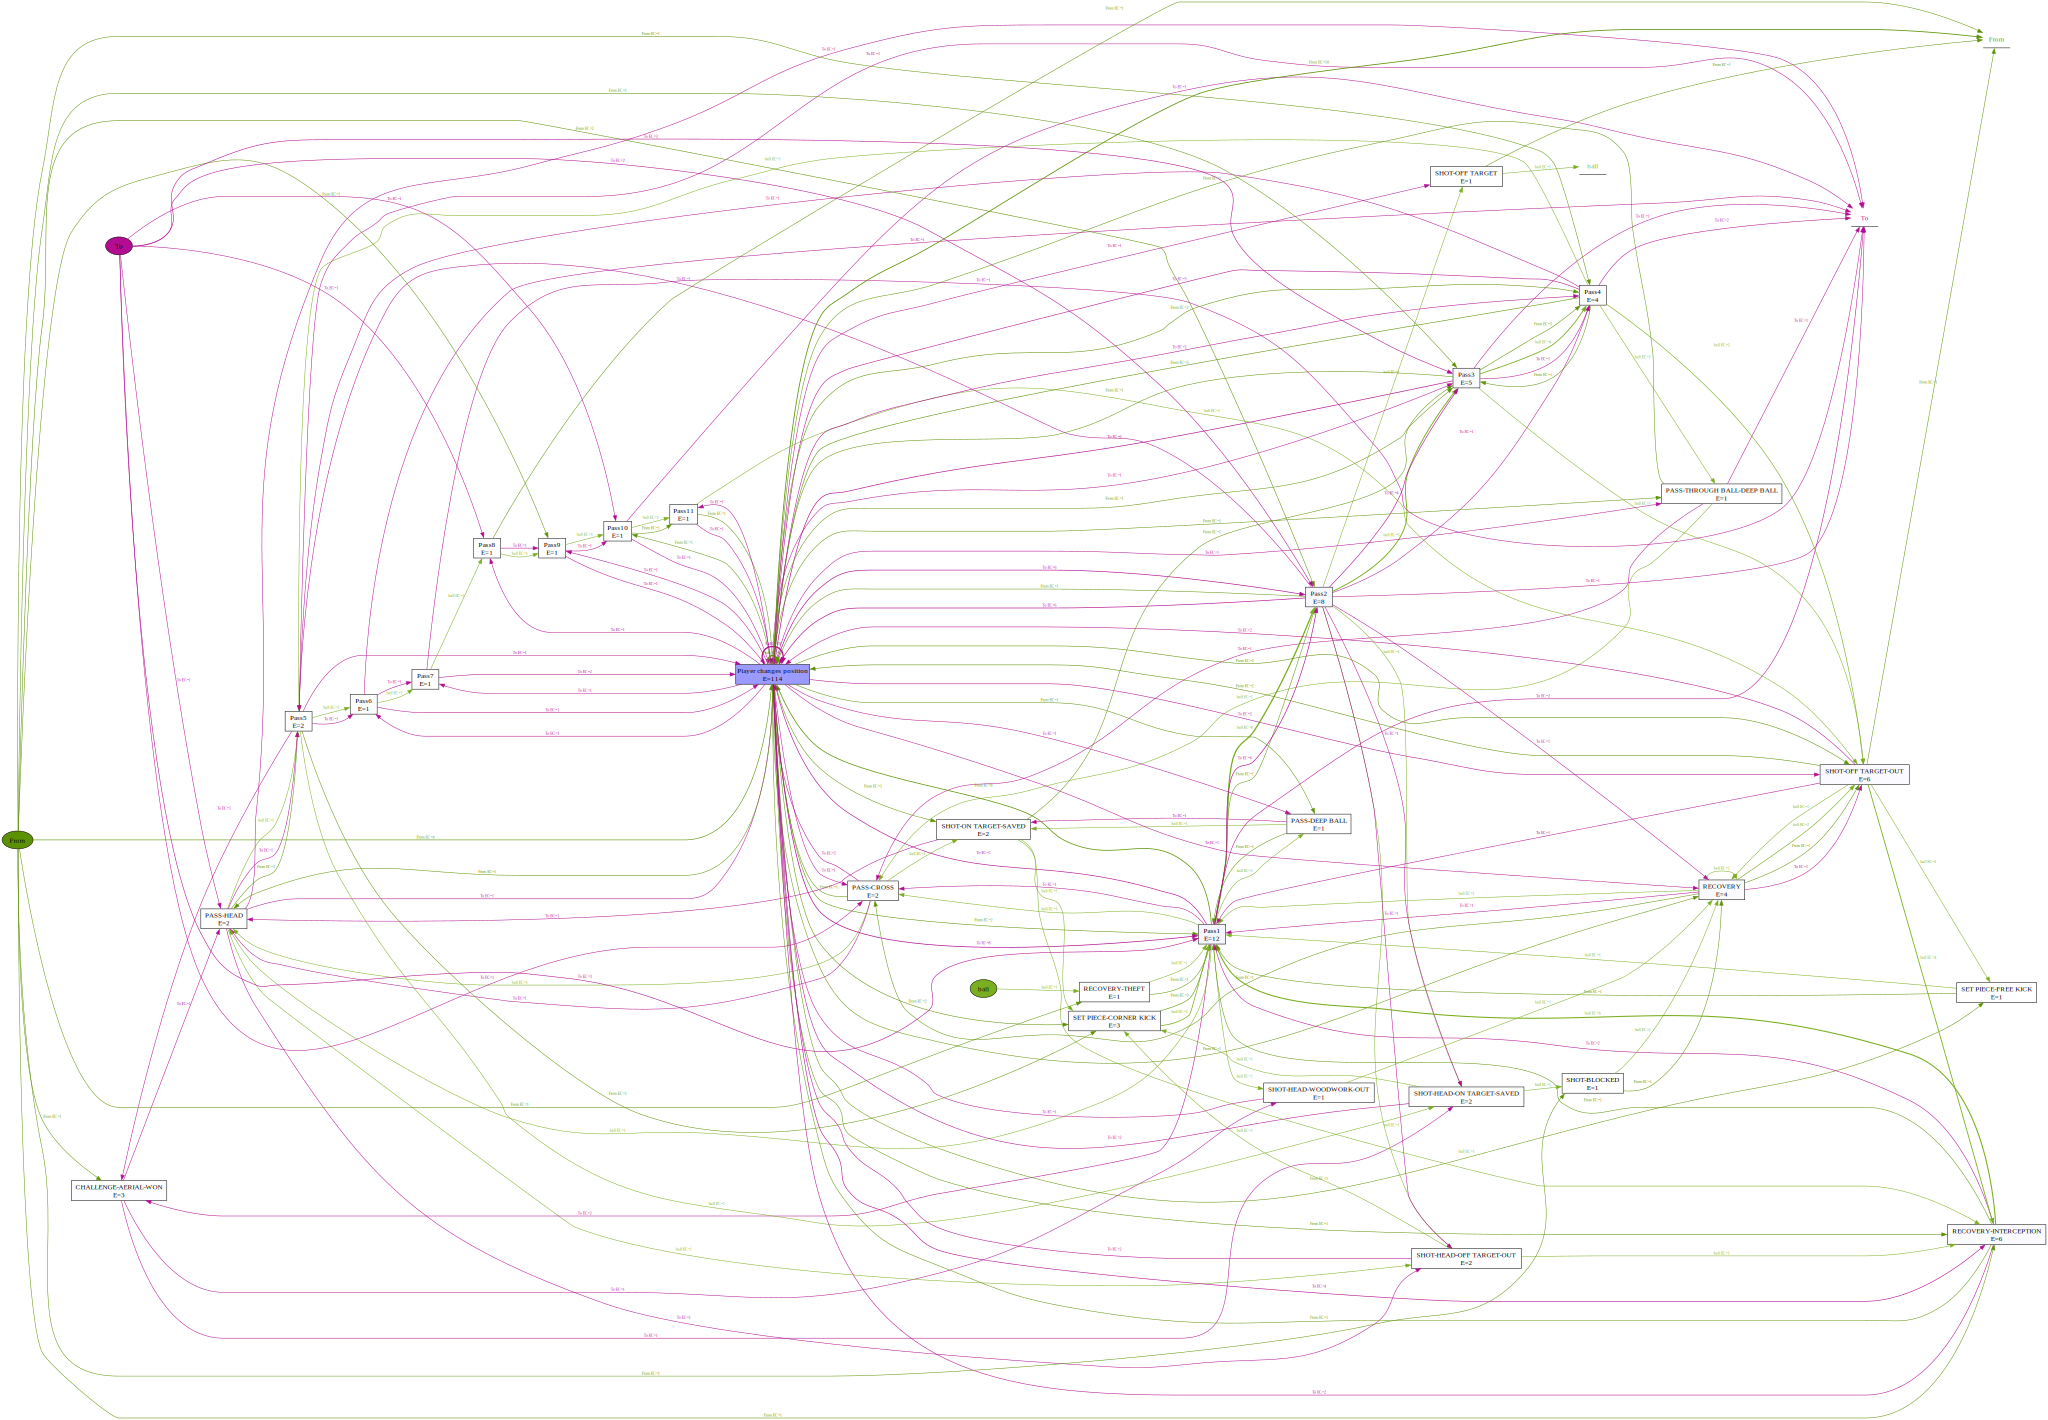

In [22]:
dfg=pm4py.ocel.discover_ocdfg(involved_player_Failed_attack_ocel_home)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

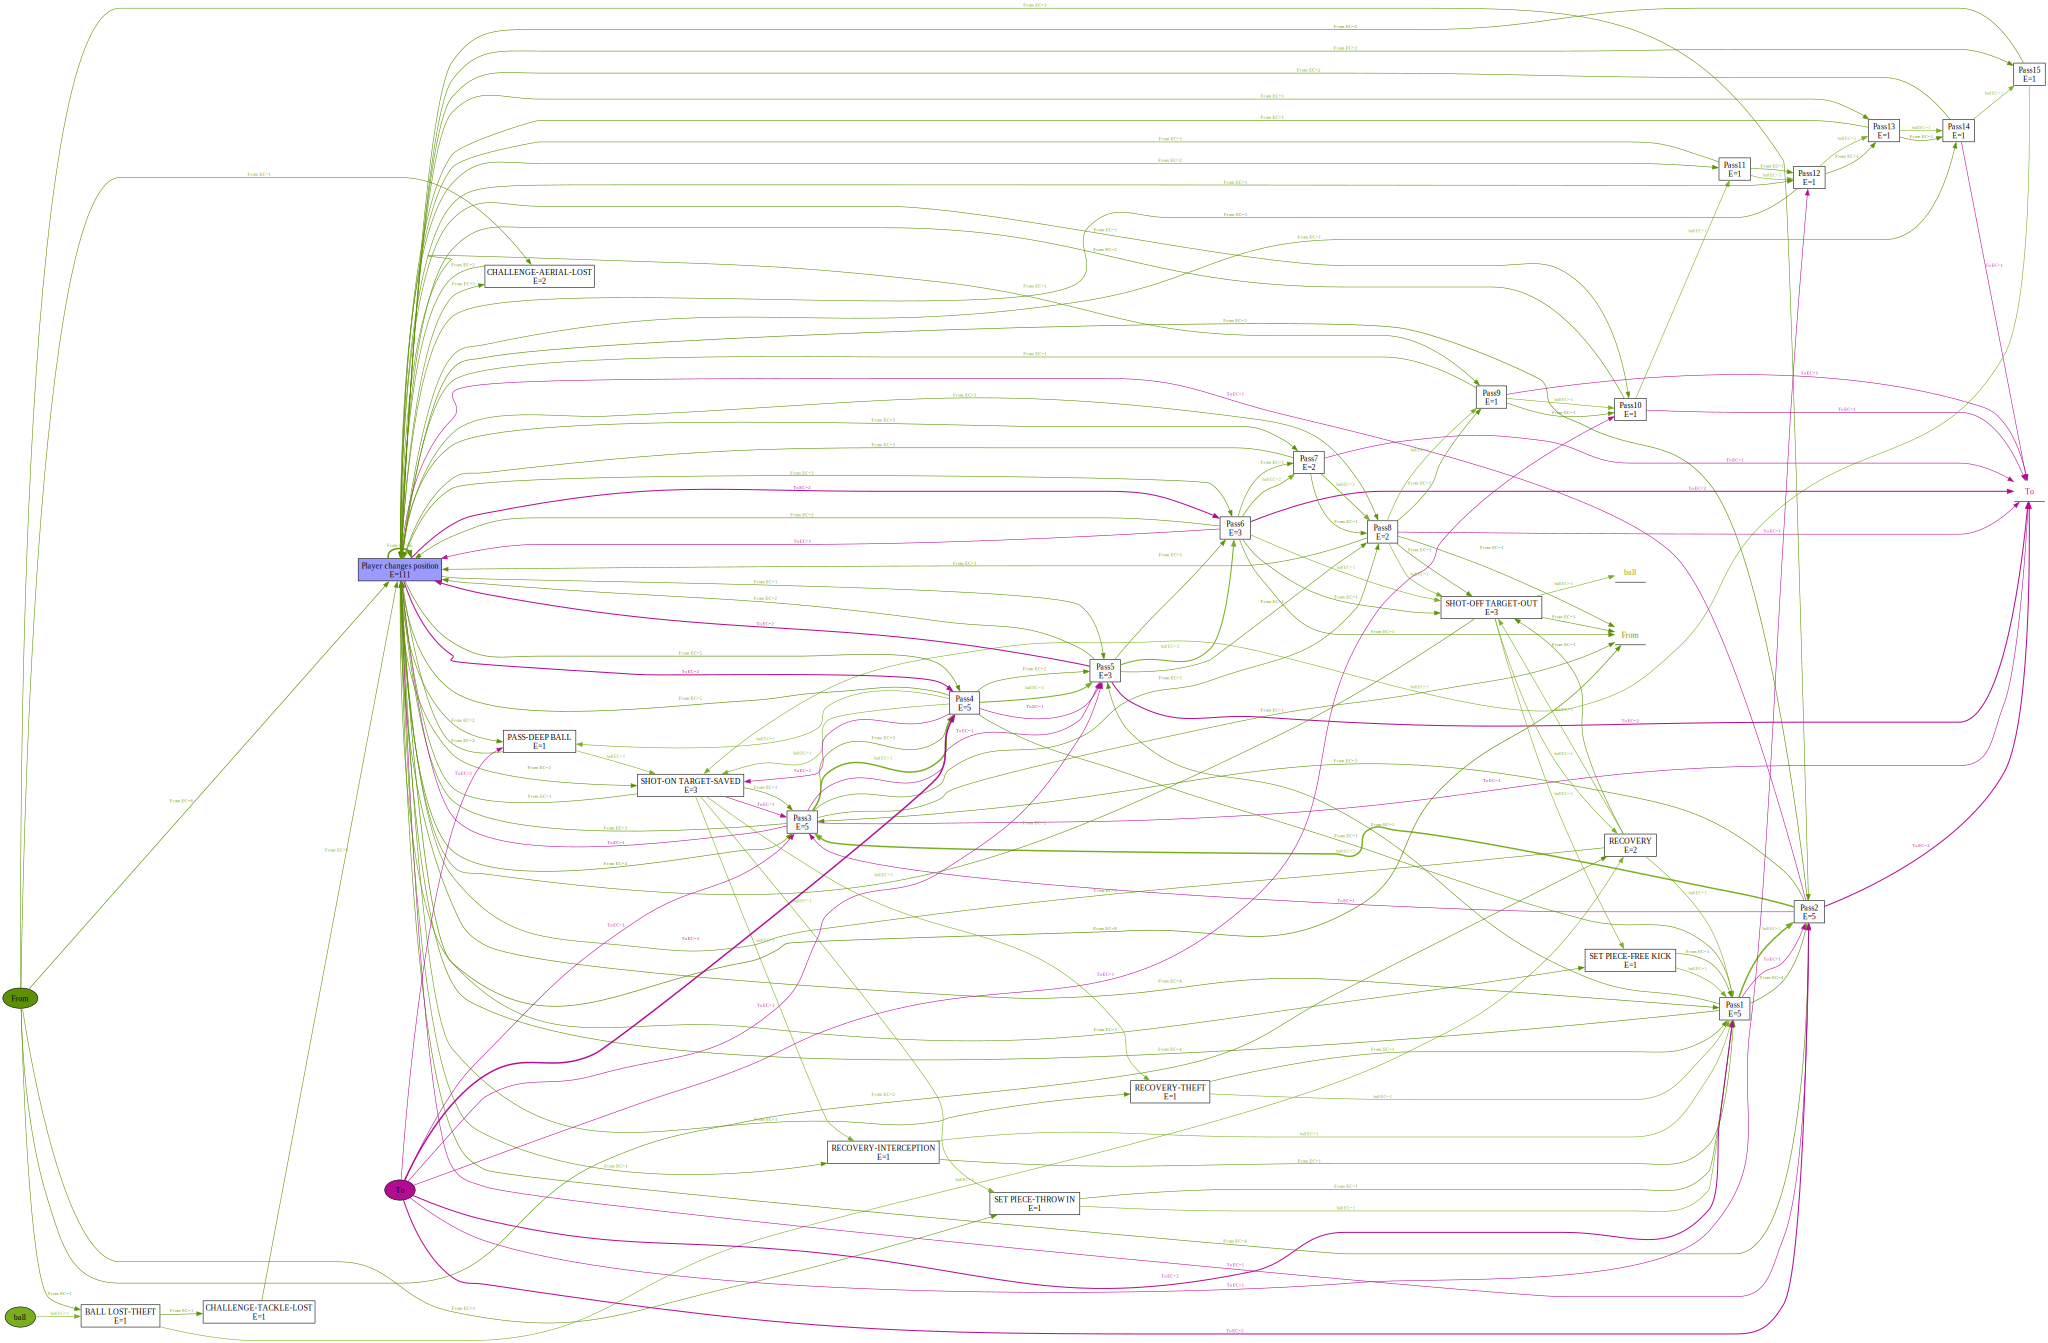

In [23]:
dfg=pm4py.ocel.discover_ocdfg(involved_player_Failed_attack_ocel_away)
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [69]:
print('For successful shots')
result= movement_frequency_report(last_player_goal_attack_df,involved_player_goal_attack_df)

For successful shots
  case:concept:name  team last_player  position_changes  \
0             HA118  Home     Player5                 7   
1             HA121  Home    Player10                14   
2             HA133  Home     Player9                 6   
3               HA4  Home     Player9                13   

   total_position_changes  average_per_player  num_involved_players  
0                       7            7.000000                     1  
1                      27           13.500000                     2  
2                       6            6.000000                     1  
3                      40           13.333333                     3  
In this game, a total of 4 shots were made. 
The aggregated total shooter grid travel is 40 
The average shooter grid travel per shot is 10.0 
The aggregated total grid travel of all involved players is 80 
The average grid travel of all attacks involved players per shot is 20.0 
The average grid travel of all attacks involved play

In [68]:
print('For failed shots')
result= movement_frequency_report(last_player_failed_attack_df,involved_player_failed_attack_df)

For failed shots
   case:concept:name  team last_player  position_changes  \
0              AA103  Away    Player19                16   
1              AA138  Away    Player27                 5   
2              AA156  Away    Player23                 6   
3               AA16  Away    Player21                 7   
4              AA166  Away    Player28                 8   
5               AA36  Away    Player24                 7   
6              HA106  Home    Player12                 6   
7               HA11  Away    Player18                 0   
8               HA11  Home    Player10                 9   
9              HA132  Home     Player5                 0   
10             HA156  Home    Player10                 5   
11             HA160  Home    Player14                 7   
12             HA173  Home     Player9                 9   
13              HA19  Home     Player8                 7   
14              HA32  Away    Player17                 0   
15              HA32  H

In [16]:
player, movement=np.unique(ocel_df[ocel_df['concept:name']=='Player changes position']['From'], return_counts=True)
player=player[np.argsort(movement)]
movement=np.sort(movement)
print(player[0],'and',player[1],'made the least amount of travel through out the game and they are likely the goalkeeper.')
print(player[0],'belongs to the',ocel_df[ocel_df['From']==player[0]].iloc[0]['Team'],'team')
print(player[1],'belongs to the',ocel_df[ocel_df['From']==player[1]].iloc[0]['Team'],'team')

Player11 and Player25 made the least amount of travel through out the game and they are likely the goalkeeper.
Player11 belongs to the Home team
Player25 belongs to the Away team


In [ ]:
from filters_and_analysis import get_player_trajectory, fraction_time_in_goal_area

for col in tracking_data_away_df.columns:
    if col.startswith("Player"):
        _,x_trace,y_trace=get_player_trajectory(tracking_data_away_df,col)
        print(col)
        fraction_time_in_goal_area(x_trace,y_trace, 'Away')
for col in tracking_data_home_df.columns:
    if col.startswith("Player"):
        _,x_trace,y_trace=get_player_trajectory(tracking_data_home_df,col)
        print(col)
        fraction_time_in_goal_area(x_trace,y_trace, 'Home')


Player25
0.16325531357323145
Player15
0.033495165717280666
Player16
0.012764989034936485
Player17
0.014971794270581908
Player18
0.0022068052356454216
Player19
0.0033102078534681324
Player20
0.03579162241562418
Player21
0.016178640883825497
Player22
0.006089403197109085
Player23
0.006944540225921686
Player24
0.014744217480655972
Player26
0.002999875867205495
Player27
0.0006689378370550184
Player28
0.0


In [3]:
pd.set_option('display.max_columns', None)
ocel.get_extended_table()

ocel:eid            ocel:activity          ocel:timestamp  \
0             0                SET PIECE 1970-01-01 00:00:00.040   
1             1  Player changes position 1970-01-01 00:00:00.040   
2             2  Player changes position 1970-01-01 00:00:00.040   
3             3  Player changes position 1970-01-01 00:00:00.040   
4             4  Player changes position 1970-01-01 00:00:00.040   
...         ...                      ...                     ...   
904118   904118  Player changes position 1970-01-01 01:36:40.240   
904119   904119  Player changes position 1970-01-01 01:36:40.240   
904120   904120  Player changes position 1970-01-01 01:36:40.240   
904121   904121  Player changes position 1970-01-01 01:36:40.240   
904122   904122  Player changes position 1970-01-01 01:36:40.240   

       attribute:subtype  attribute:duration attribute:start_grid  \
0               KICK OFF               -0.04               [None]   
1                    NaN                 NaN                  NaN   
2                    NaN                 NaN                  NaN   
3                    NaN                 NaN                  NaN   
4                    NaN                 NaN                  NaN   
...                  ...                 ...                  ...   
904118               NaN                 NaN                  NaN   
904119               NaN                 NaN                  NaN   
904120               NaN                 NaN                  NaN   
904121               NaN                 NaN                  NaN   
904122               NaN                 NaN                  NaN   

       attribute:crossed_grid  attribute:attack_game  \
0                       False                      1   
1                         NaN                      1   
2                         NaN                      1   
3                         NaN                      1   
4                         NaN                      1   
...                       ...                    ...   
904118                    NaN                    355   
904119                    NaN                    355   
904120                    NaN                    355   
904121                    NaN                    355   
904122                    NaN                    355   

        attribute:attack_successful  attribute:home_team_score  \
0                             False                          0   
1                             False                          0   
2                             False                          0   
3                             False                          0   
4                             False                          0   
...                             ...                        ...   
904118                        False                          4   
904119                        False                          4   
904120                        False                          4   
904121                        False                          4   
904122                        False                          4   

        attribute:away_team_score  attribute:end_x  attribute:end_y  \
0                               0              NaN              NaN   
1                               0          0.41094          0.72589   
2                               0          0.52697          0.37980   
3                               0          0.41698          0.47843   
4                               0          0.40783          0.61525   
...                           ...              ...              ...   
904118                          0              NaN              NaN   
904119                          0              NaN              NaN   
904120                          0              NaN              NaN   
904121                          0              NaN              NaN   
904122                          0              NaN              NaN   

        attribute:start_x  attribute:start

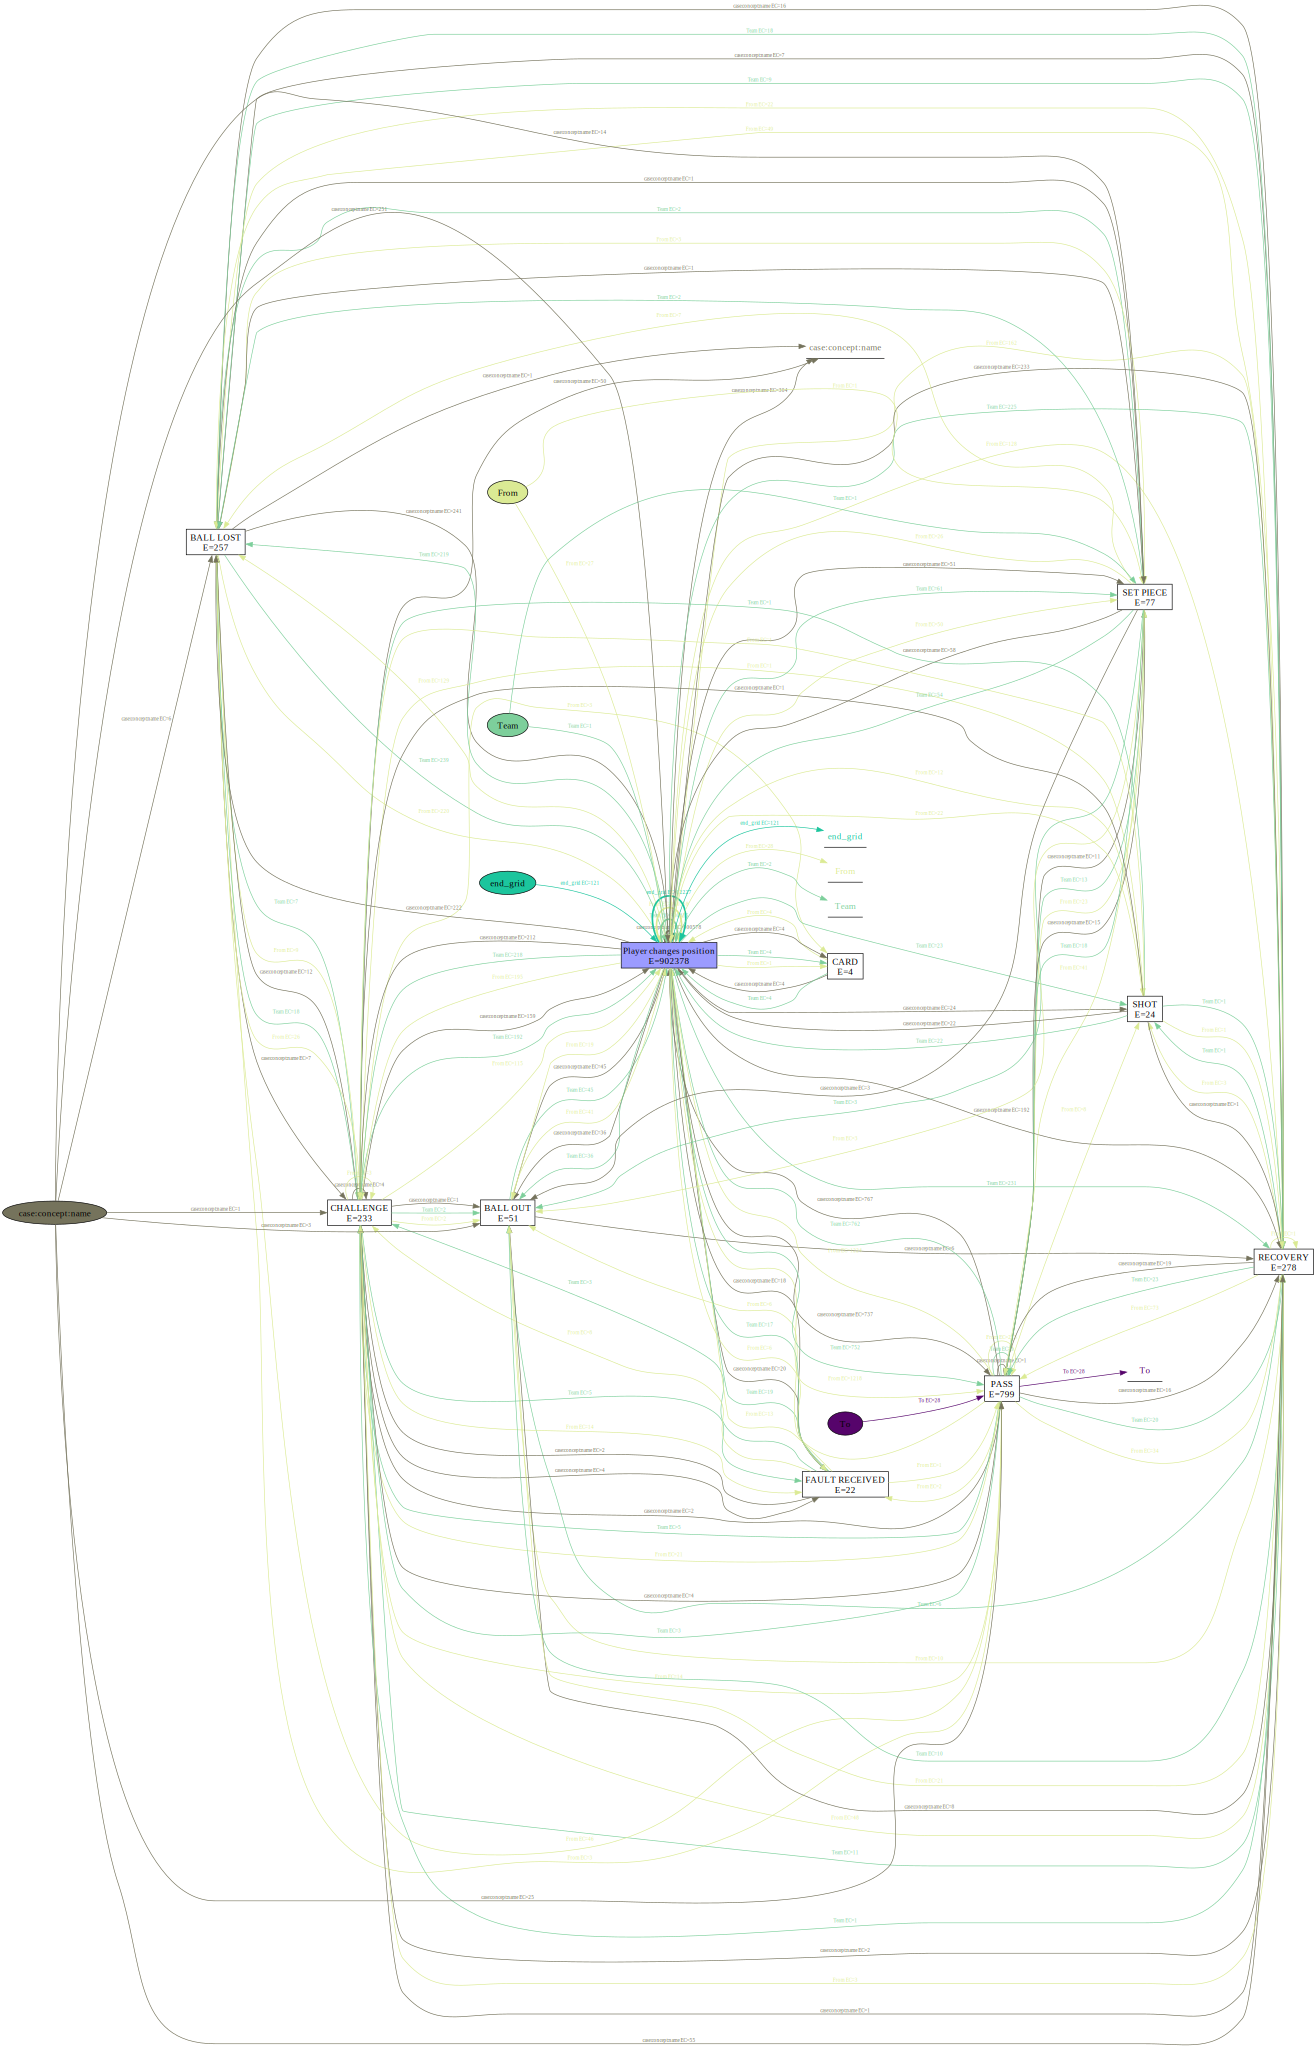

In [6]:
dfg=pm4py.ocel.discover_ocdfg(pm4py.filtering.filter_ocel_events(ocel,['Player changes position'],False))
pm4py.visualization.ocel.ocdfg.visualizer.apply(dfg)

In [ ]:
ocpn=pm4py.discovery.discover_oc_petri_net(ocel)
pm4py.visualization.ocel.ocpn.visualizer.apply(ocpn)

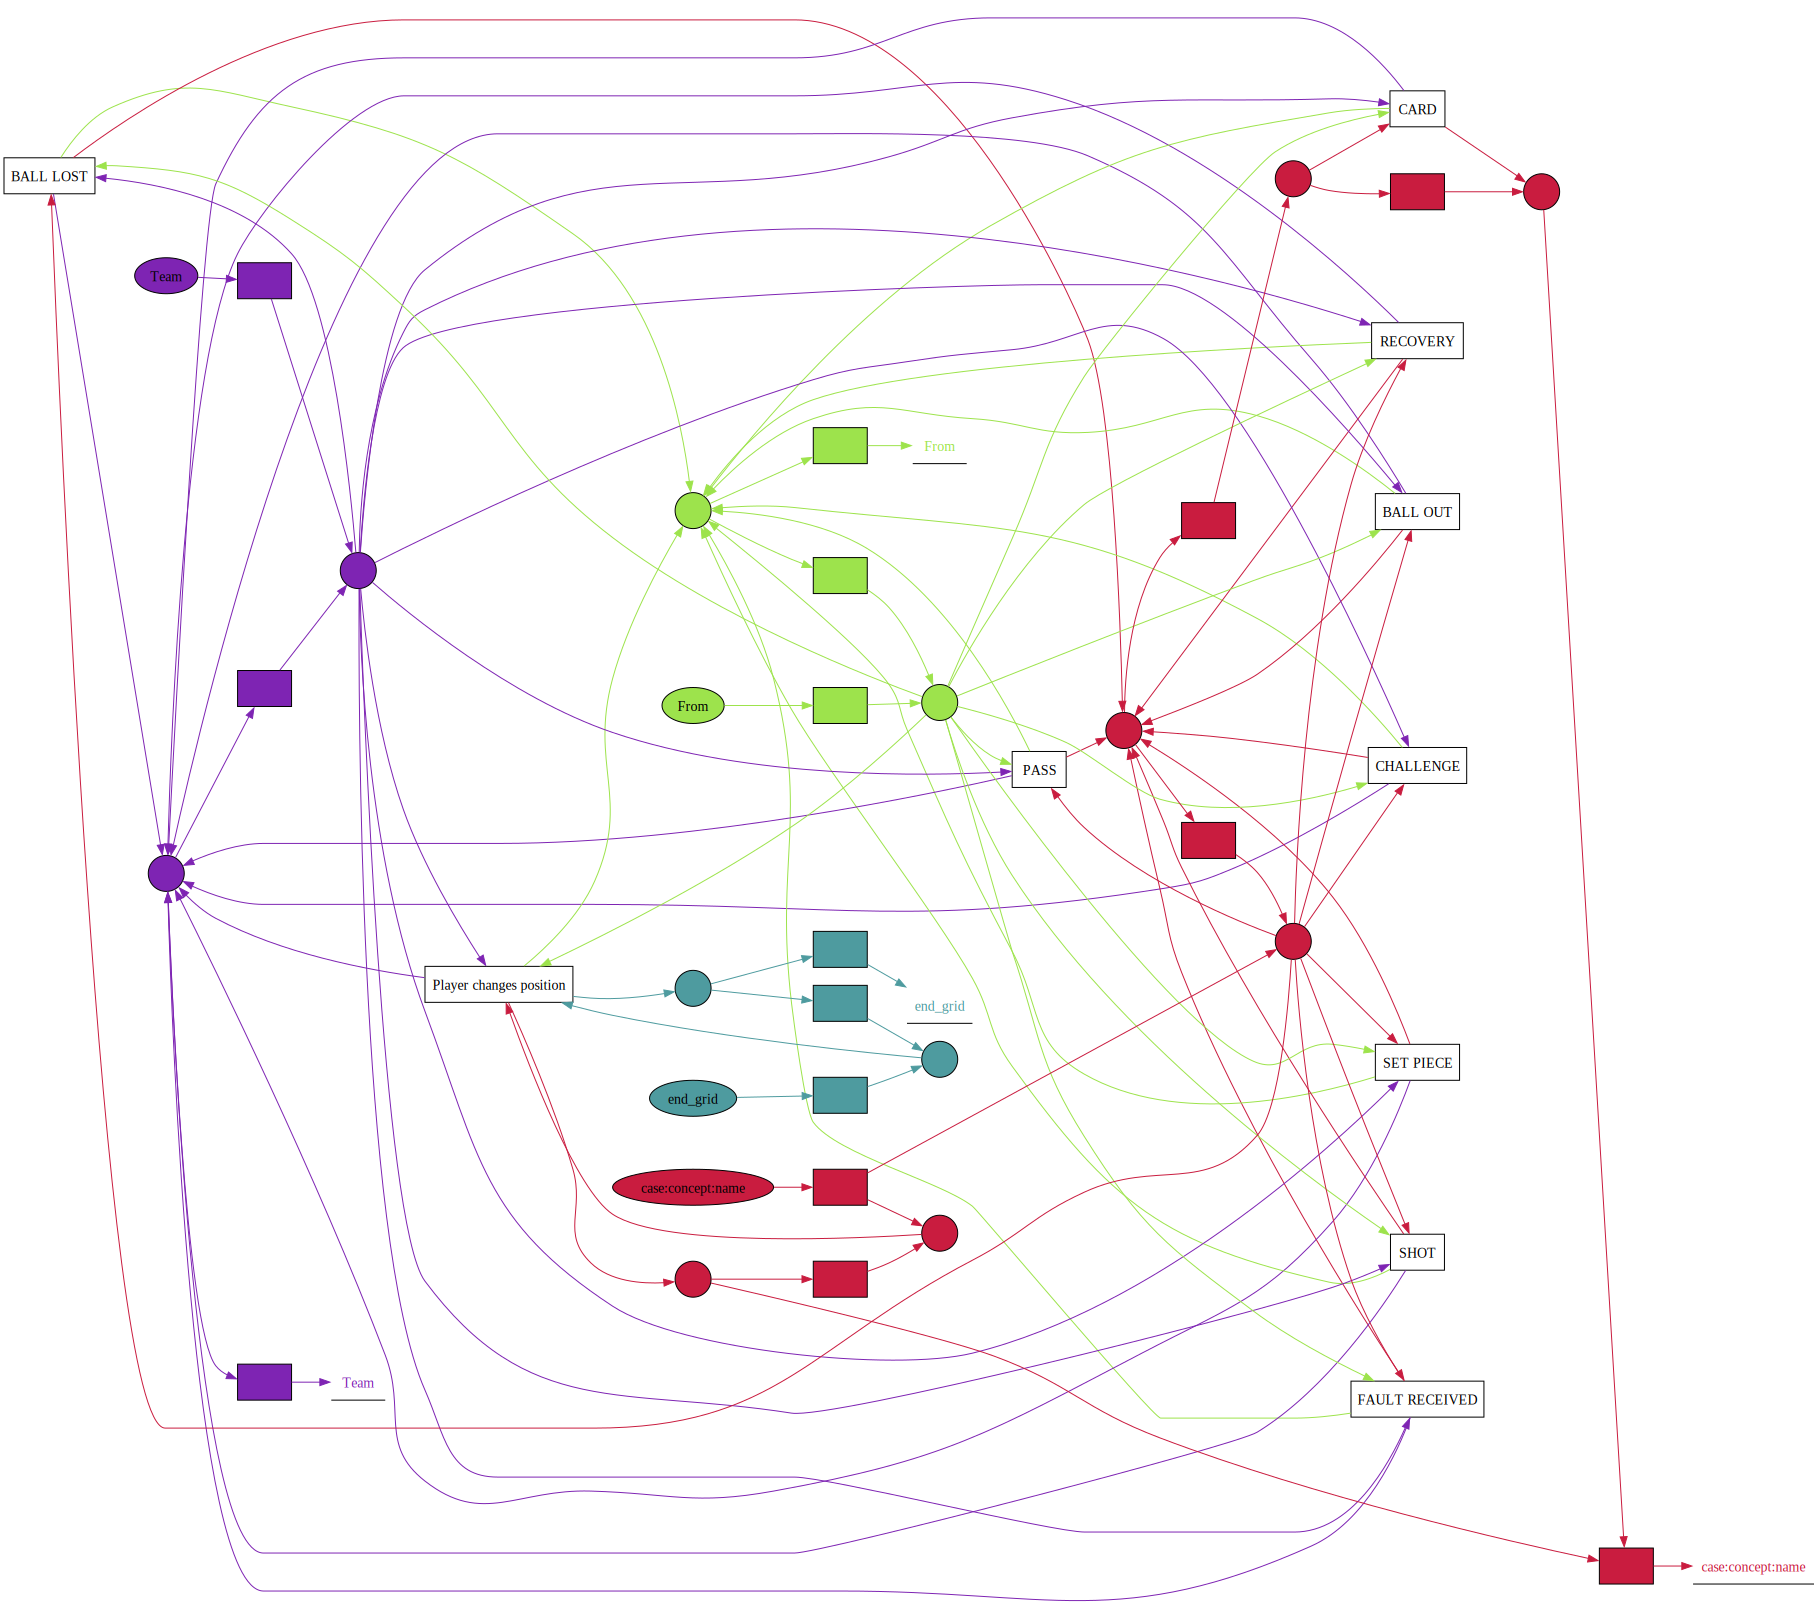

In [5]:
ocpn=pm4py.algo.discovery.ocel.ocpn.algorithm.apply(ocel)
pm4py.visualization.ocel.ocpn.visualizer.apply(ocpn)

In [10]:
obj_graph = pm4py.ocel_discover_objects_graph(ocel, graph_type='object_interaction')
pm4py.visualization.ocel.objects_graph.visualizer.apply(obj_graph, parameters={"format": "svg"})

AttributeError: module 'pm4py' has no attribute 'ocel_discover_objects_graph'

In [9]:
objects_summary = pm4py.ocel_objects_summary(ocel)

In [ ]:
objects_summary['unique_activites'] = objects_summary['activities_lifecycle'].apply(lambda x: list(set(x)))
objects_summary_player=objects_summary[objects_summary['ocel:oid'].str.lower().str.startswith('player')]

In [31]:
mask_with = objects_summary_player['activities_lifecycle'].apply(lambda x: 'FAULT RECEIVED' in x)
print(objects_summary_player.loc[mask_with, 'ocel:oid'])

478     Player1
479    Player10
481    Player12
482    Player13
486    Player17
487    Player18
488    Player19
493    Player23
497    Player27
498    Player28
499     Player3
502     Player6
503     Player7
504     Player8
505     Player9
Name: ocel:oid, dtype: object


In [33]:
mask_without = objects_summary_player['activities_lifecycle'].apply(lambda x: 'FAULT RECEIVED' not in x)
print(objects_summary_player.loc[mask_without, 'ocel:oid'])

480    Player11
483    Player14
484    Player15
485    Player16
489     Player2
490    Player20
491    Player21
492    Player22
494    Player24
495    Player25
496    Player26
500     Player4
501     Player5
Name: ocel:oid, dtype: object


In [16]:
player_stats=pd.DataFrame()
player_stats['ocel:oid'] = objects_summary_player['ocel:oid']
player_stats['fault'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('FAULT RECEIVED'))
player_stats['ball_lost'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('BALL LOST'))
player_stats['card'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('CARD'))
player_stats['shot'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('SHOT'))
player_stats['recovery'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('RECOVERY'))
player_stats['set_piece'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('SET PIECE'))
player_stats['ball_out'] = objects_summary_player['activities_lifecycle'].apply(lambda x: x.count('BALL OUT'))
player_stats['away_team'] = objects_summary_player['interacting_objects'].apply(lambda x: 'Away' in x)
player_stats['home_team'] = objects_summary_player['interacting_objects'].apply(lambda x: 'Home' in x)
player_stats.sort_values(by='home_team', inplace=True)
player_stats

ocel:oid  fault  ball_lost  card  shot  recovery  set_piece  ball_out  \
491  Player21      0         15     0     1         8          6         1   
494  Player24      0          2     0     1         0          0         0   
493  Player23      1          4     0     1         4          1         1   
492  Player22      0         11     0     0        12          8         5   
497  Player27      1          2     0     1         4          0         1   
490  Player20      0          4     0     0        10          1         3   
498  Player28      2          2     0     1         1          0         1   
488  Player19      1         23     0     1        14          7         3   
495  Player25      0          9     0     0        20          3         3   
487  Player18      1         15     0     0         9          2         2   
485  Player16      0          9     0     0        21          2         5   
484  Player15      0         12     1     0        22          0         5   
486  Player17      1         17     0     0        16          2         2   
496  Player26      0          3     1     0         2          0         1   
499   Player3      1          8     0     0        16          3         2   
500   Player4      0         10     0     0        11          6         2   
501   Player5      0          8     1     2        10          0         1   
502   Player6      3          8     0     0        12         13         1   
503   Player7      1         14     0     2        11         10         2   
478   Player1      1          7     0     0         7          1         1   
489   Player2      0         15     0     0        18          4         3   
483  Player14      0          5     1     1         2          0         0   
482  Player13      1          0     0     0         0          0         0   
481  Player12      2          6     0     1         8          1         0   
480  Player11      0         13     0     0        19          4         1   
479  Player10      2         12     0     4         3          2         1   
504   Player8      3         17     0     4        13          0         3   
505   Player9      1          6     0     4         5          1         1   

     away_team  home_team  
491       True      False  
494       True      False  
493       True      False  
492       True      False  
497       True      False  
490       True      False  
498       True      False  
488       True      False  
495       True      False  
487       True      False  
485       True      False  
484       True      False  
486       True      False  
496       True      False  
499      False       True  
500      False       True  
501      False       True  
502      False       True  
503      False       True  
478      False       True  
489      False       True  
483      False       True  
482      False       True  
481      False       True  
480      False       True  
479      False       True  
504      False       True  
505      False       True

In [ ]:
#took super long not sure if it works
pm4py.ocel.ocel_temporal_summary(ocel)

ocel:timestamp  \
0     1970-01-01 00:00:00.040   
1     1970-01-01 00:00:00.120   
2     1970-01-01 00:00:00.240   
3     1970-01-01 00:00:00.560   
4     1970-01-01 00:00:00.680   
5     1970-01-01 00:00:00.760   
6     1970-01-01 00:00:00.920   
7     1970-01-01 00:00:00.960   
8     1970-01-01 00:00:01.800   
9     1970-01-01 00:00:02.080   
10    1970-01-01 00:00:02.200   
11    1970-01-01 00:00:02.240   
12    1970-01-01 00:00:02.440   
13    1970-01-01 00:00:03.080   
14    1970-01-01 00:00:03.160   
15    1970-01-01 00:00:03.360   
16    1970-01-01 00:00:03.520   
17    1970-01-01 00:00:03.720   
18    1970-01-01 00:00:03.840   
19    1970-01-01 00:00:04.240   
20    1970-01-01 00:00:04.320   
21    1970-01-01 00:00:04.840   
22    1970-01-01 00:00:05.000   
23    1970-01-01 00:00:05.160   
24    1970-01-01 00:00:05.200   
25    1970-01-01 00:00:05.280   
26    1970-01-01 00:00:05.320   
27    1970-01-01 00:00:05.600   
28    1970-01-01 00:00:06.240   
29    1970-01-01 00:00:06.280   
30    1970-01-01 00:00:06.680   
31    1970-01-01 00:00:06.960   
32    1970-01-01 00:00:07.040   
33    1970-01-01 00:00:07.360   
34    1970-01-01 00:00:07.600   
35    1970-01-01 00:00:07.640   
36    1970-01-01 00:00:07.800   
37    1970-01-01 00:00:08.120   
38    1970-01-01 00:00:08.400   
39    1970-01-01 00:00:08.680   
40    1970-01-01 00:00:08.720   
41    1970-01-01 00:00:08.840   
42    1970-01-01 00:00:08.880   
43    1970-01-01 00:00:08.920   
44    1970-01-01 00:00:09.040   
45    1970-01-01 00:00:09.480   
46    1970-01-01 00:00:09.560   
47    1970-01-01 00:00:09.600   
48    1970-01-01 00:00:09.680   
49    1970-01-01 00:00:09.760   
50    1970-01-01 00:00:10.360   
51    1970-01-01 00:00:11.160   
52    1970-01-01 00:00:11.360   
53    1970-01-01 00:00:11.520   
54    1970-01-01 00:00:12.000   
55    1970-01-01 00:00:12.120   
56    1970-01-01 00:00:12.160   
57    1970-01-01 00:00:12.280   
58    1970-01-01 00:00:12.640   
59    1970-01-01 00:00:13.240   
60    1970-01-01 00:00:13.840   
61    1970-01-01 00:00:13.920   
62    1970-01-01 00:00:14.560   
63    1970-01-01 00:00:14.800   
64    1970-01-01 00:00:15.120   
65    1970-01-01 00:00:15.320   
66    1970-01-01 00:00:16.040   
67    1970-01-01 00:00:16.280   
68    1970-01-01 00:00:16.320   
69    1970-01-01 00:00:16.400   
70    1970-01-01 00:00:16.760   
71    1970-01-01 00:00:16.800   
72    1970-01-01 00:00:16.920   
73    1970-01-01 00:00:17.040   
74    1970-01-01 00:00:18.120   
75    1970-01-01 00:00:18.160   
76    1970-01-01 00:00:18.320   
77    1970-01-01 00:00:18.440   
78    1970-01-01 00:00:19.520   
79    1970-01-01 00:00:19.880   
80    1970-01-01 00:00:19.920   
81    1970-01-01 00:00:20.040   
82    1970-01-01 00:00:20.320   
83    1970-01-01 00:00:20.480   
84    1970-01-01 00:00:20.520   
85    1970-01-01 00:00:20.560   
86    1970-01-01 00:00:21.120   
87    1970-01-01 00:00:21.440   
88    1970-01-01 00:00:21.480   
89    1970-01-01 00:00:21.600   
90    1970-01-01 00:00:21.840   
91    1970-01-01 00:00:22.080   
92    1970-01-01 00:00:22.240   
93    1970-01-01 00:00:22.280   
94    1970-01-01 00:00:22.720   
95    1970-01-01 00:00:22.880   
96    1970-01-01 00:00:22.920   
97    1970-01-01 00:00:23.200   
98    1970-01-01 00:00:23.360   
99    1970-01-01 00:00:23.400   
100   1970-01-01 00:00:23.440   
101   1970-01-01 00:00:24.200   
102   1970-01-01 00:00:24.480   
103   1970-01-01 00:00:24.720   
104   1970-01-01 00:00:24.760   
105   1970-01-01 00:00:24.800   
106   1970-01-01 00:00:25.120   
107   1970-01-01 00:00:25.160   
108   1970-01-01 00:00:25.200   
109   1970-01-01 00:00:25.480   
110   1970-01-01 00:00:25.640   
111   1970-01-01 00:00:25.720   
112   1970-01-01 00:00:25.760   
113   1970-01-01 00:00:26.200   
114   1970-01-01 00:00:26.760   
115   1970-01-01 00:00:26.840   
116   1970-01-01 00:00:26.880   
117   1970-01-01 00:00:26.920   
118   1970-01-01 00:00:27.160   
119   1970-01-01 00:00:27.280   
120   1970-01-01 00:00

In [23]:
pm4py.statistics.ocel.act_utils.find_associations_from_ocel(ocel, {'EVENT_ACTIVIT':'SHOT'})

{'BALL LOST': [('2216', 'Away'),
  ('2216', 'Player17'),
  ('2216', 'AA1'),
  ('2421', 'Home'),
  ('2421', 'Player2'),
  ('2421', 'HA1'),
  ('2889', 'Away'),
  ('2889', 'Player16'),
  ('2889', 'AA2'),
  ('3643', 'Home'),
  ('3643', 'Player10'),
  ('3643', 'HA2'),
  ('7052', 'Away'),
  ('7052', 'Player17'),
  ('7052', 'AA3'),
  ('8748', 'Home'),
  ('8748', 'Player8'),
  ('8748', 'HA3'),
  ('27779', 'Home'),
  ('27779', 'Player10'),
  ('27779', 'HA5'),
  ('28053', 'Away'),
  ('28053', 'Player19'),
  ('28053', 'AA6'),
  ('28885', 'Home'),
  ('28885', 'Player1'),
  ('28885', 'HA6'),
  ('29441', 'Away'),
  ('29441', 'Player17'),
  ('29441', 'AA7'),
  ('31713', 'Away'),
  ('31713', 'Player19'),
  ('31713', 'AA8'),
  ('32486', 'Home'),
  ('32486', 'Player1'),
  ('32486', 'HA8'),
  ('32653', 'Away'),
  ('32653', 'Player19'),
  ('32653', 'AA9'),
  ('33196', 'Home'),
  ('33196', 'Player1'),
  ('33196', 'HA9'),
  ('34407', 'Away'),
  ('34407', 'Player18'),
  ('34407', 'AA10'),
  ('34502', 'Home')

In [27]:
ocel_logs_by_object_type

[Object-Centric Event Log (number of events: 904123, number of objects: 506, number of activities: 10, number of object types: 4, events-objects relationships: 2745516)
 Activities occurrences: Counter({'Player changes position': 902378, 'PASS': 799, 'RECOVERY': 278, 'BALL LOST': 257, 'CHALLENGE': 233, 'SET PIECE': 77, 'BALL OUT': 51, 'SHOT': 24, 'FAULT RECEIVED': 22, 'CARD': 4})
 Object types occurrences (number of objects): Counter({'case:concept:name': 355, 'end_grid': 121, 'From': 28, 'Team': 2})
 Unique activities per object type: Counter({'From': 10, 'Team': 10, 'case:concept:name': 10, 'To': 1, 'end_grid': 1})
 Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.]

In [32]:
from pm4py.algo.transformation.ocel.graphs import object_interaction_graph
obj_graph = object_interaction_graph.apply(ocel)#, {'graph_type':'object_interaction'})
obj_graph
#pm4py.visualization.ocel.objects_graph.visualizer.apply(obj_graph, parameters={"format": "svg"})

{('AA40', 'Player25'),
 ('HA47', 'Player23'),
 ('AA124', 'Player7'),
 ('D5', 'Player7'),
 ('G8', 'HA92'),
 ('D6', 'HA111'),
 ('AA162', 'Player9'),
 ('AA98', 'I4'),
 ('AA21', 'I5'),
 ('HA118', 'Player16'),
 ('H5', 'Player24'),
 ('AA101', 'I9'),
 ('AA98', 'Player14'),
 ('AA51', 'E6'),
 ('AA104', 'B7'),
 ('AA155', 'Player2'),
 ('H6', 'Player16'),
 ('G3', 'Player4'),
 ('HA32', 'Player3'),
 ('AA21', 'J1'),
 ('C3', 'Player23'),
 ('AA114', 'Player15'),
 ('HA107', 'Player12'),
 ('HA129', 'Player2'),
 ('Player17', 'Player26'),
 ('HA115', 'Player14'),
 ('Player17', 'Player19'),
 ('HA54', 'Player15'),
 ('C7', 'HA132'),
 ('HA152', 'Player7'),
 ('AA99', 'H1'),
 ('AA111', 'Player27'),
 ('HA49', 'Player25'),
 ('C8', 'Home'),
 ('HA81', 'Player22'),
 ('H5', 'HA32'),
 ('G10', 'Player12'),
 ('AA63', 'G3'),
 ('C5', 'Player6'),
 ('AA130', 'Player16'),
 ('AA19', 'I1'),
 ('D6', 'HA119'),
 ('I10', 'Player22'),
 ('AA44', 'Away'),
 ('E4', 'HA115'),
 ('HA111', 'Player25'),
 ('AA162', 'G1'),
 ('HA67', 'Player8'),

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(12, 8))
pos = nx.spring_layout(obj_graph)  # or use kamada_kawai_layout, shell_layout, etc.
nx.draw(obj_graph, pos, with_labels=True, node_size=5, font_size=10, arrows=True)
edge_labels = nx.get_edge_attributes(obj_graph, 'weight')  # or another attribute if used
nx.draw_networkx_edge_labels(obj_graph, pos, edge_labels=edge_labels)
plt.title("Object Interaction Graph")
plt.show()


In [ ]:
pm4py.algo.transformation.ocel.features.objects.object_degree_centrality.apply(ocel)